In [353]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Read Data

In [354]:
train = pd.read_csv('../Dataset/FitbitTrainData.csv')
test = pd.read_csv('../Dataset/FitbitTestData.csv')

In [355]:
len(train.columns)

30

In [356]:
train.tail()

Total_MET  Avg_METs  TotalDistance  DistancePerStep  TrackerDistance  \
652 14400.0000   10.0000         0.0000           0.0000           0.0000   
653 17420.0000   12.0972         1.7000           0.0007           1.7000   
654 21472.0000   14.9111         7.3500           0.0008           7.3500   
655 22231.0000   15.4382         7.3800           0.0008           7.3800   
656 19536.0000   13.5667         3.5500           0.0007           3.5500   

     StepsbyDistance  TotalActiveDistance  TotalSteps  ActiveRatio  \
652           0.0000               0.0000           0       0.0000   
653        1484.7058               1.6900        2524       0.1167   
654        1282.0408               7.3100        9423       0.2007   
655        1301.2195               7.3900        9603       0.1736   
656        1513.2395               3.5500        5372       0.1528   

     AverageActiveMinutes  ...  AveragePace  ActiveGroup  VeryActiveRatio  \
652                0.0000  ...       0.0000            0           0.0000   
653               56.0000  ...       0.6071            0           0.0000   
654               96.3333  ...       1.5260            2           0.0049   
655               83.3333  ...       1.7712            2           0.0105   
656               73.3333  ...       0.9682            1           0.0000   

     VeryActiveDistance  FairlyActiveRatio  ActiveDistanceRatio  \
652              0.0000             0.0000               0.0000   
653              0.0000             0.0056               0.9941   
654              0.5300             0.0306               0.9946   
655              0.6300             0.0340               1.0014   
656              0.0000             0.0000               1.0000   

     FairlyActiveMinutes  TotalUsageMinutes  ModeratelyActiveDistance  \
652                    0               1440                    0.0000   
653                    8               1440                    0.3500   
654                   44               1440                    2.0300   
655                   39               1146                    1.6700   
656                    0               1440                    0.0000   

     Calories  
652      1347  
653      1529  
654      3012  
655      2899  
656      1827  

[5 rows x 30 columns]

In [357]:
test.tail()

Total_MET  Avg_METs  TotalDistance  DistancePerStep  TrackerDistance  \
277 17776.0000   12.3444         2.3100           0.0007           2.3100   
278 15565.0000   10.8090         1.0400           0.0007           1.0400   
279 20993.0000   14.5785         5.4100           0.0007           5.4100   
280 20918.0000   14.5264         3.7000           0.0007           3.7000   
281 17718.0000   12.3042         2.3400           0.0008           2.3400   

     StepsbyDistance  TotalActiveDistance  TotalSteps  ActiveRatio  \
277        1374.8918               2.3100        3176       0.0833   
278        1451.9231               1.0400        1510       0.0333   
279        1462.6618               5.4100        7913       0.1722   
280        1337.8378               3.7000        4950       0.0944   
281        1258.9744               2.3400        2946       0.0840   

     AverageActiveMinutes  ...  AveragePace  ActiveGroup  VeryActiveRatio  \
277               40.0000  ...       1.1550            0           0.0000   
278               16.0000  ...       1.3000            0           0.0000   
279               82.6667  ...       1.3089            2           0.0194   
280               45.3333  ...       1.6324            0           0.0285   
281               40.3333  ...       1.1603            0           0.0000   

     VeryActiveDistance  FairlyActiveRatio  ActiveDistanceRatio  \
277              0.0000             0.0000               1.0000   
278              0.0000             0.0000               1.0000   
279              2.1600             0.0049               1.0000   
280              1.9300             0.0111               1.0000   
281              0.0000             0.0000               1.0000   

     FairlyActiveMinutes  TotalUsageMinutes  ModeratelyActiveDistance  \
277                    0               1313                    0.0000   
278                    0               1440                    0.0000   
279                    7               1440                    0.3400   
280                   16               1440                    0.3200   
281                    0                901                    0.0000   

     Calories  
277      2498  
278      2229  
279      1835  
280      2643  
281      2660  

[5 rows x 30 columns]

# Robust Scaler

In [358]:
# from sklearn.preprocessing import RobustScaler

# # Inisialisasi RobustScaler
# robust_scaler = RobustScaler()

# # Tentukan kolom yang akan diskalakan (semua kolom kecuali 'Calories')
# col_to_scale = [col for col in train.columns if col != "Calories"]

# # Fit scaler pada data pelatihan dan transformasi
# train[col_to_scale] = robust_scaler.fit_transform(train[col_to_scale])

# # Transformasi data pengujian dengan scaler yang sama
# test[col_to_scale] = robust_scaler.transform(test[col_to_scale])

# Standard Scaler

In [359]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi RobustScaler
robust_scaler = StandardScaler()

# Tentukan kolom yang akan diskalakan (semua kolom kecuali 'Calories')
col_to_scale = [col for col in train.columns if col != "Calories"]

# Fit scaler pada data pelatihan dan transformasi
train[col_to_scale] = robust_scaler.fit_transform(train[col_to_scale])

# Transformasi data pengujian dengan scaler yang sama
test[col_to_scale] = robust_scaler.transform(test[col_to_scale])

# Correlation Matrix

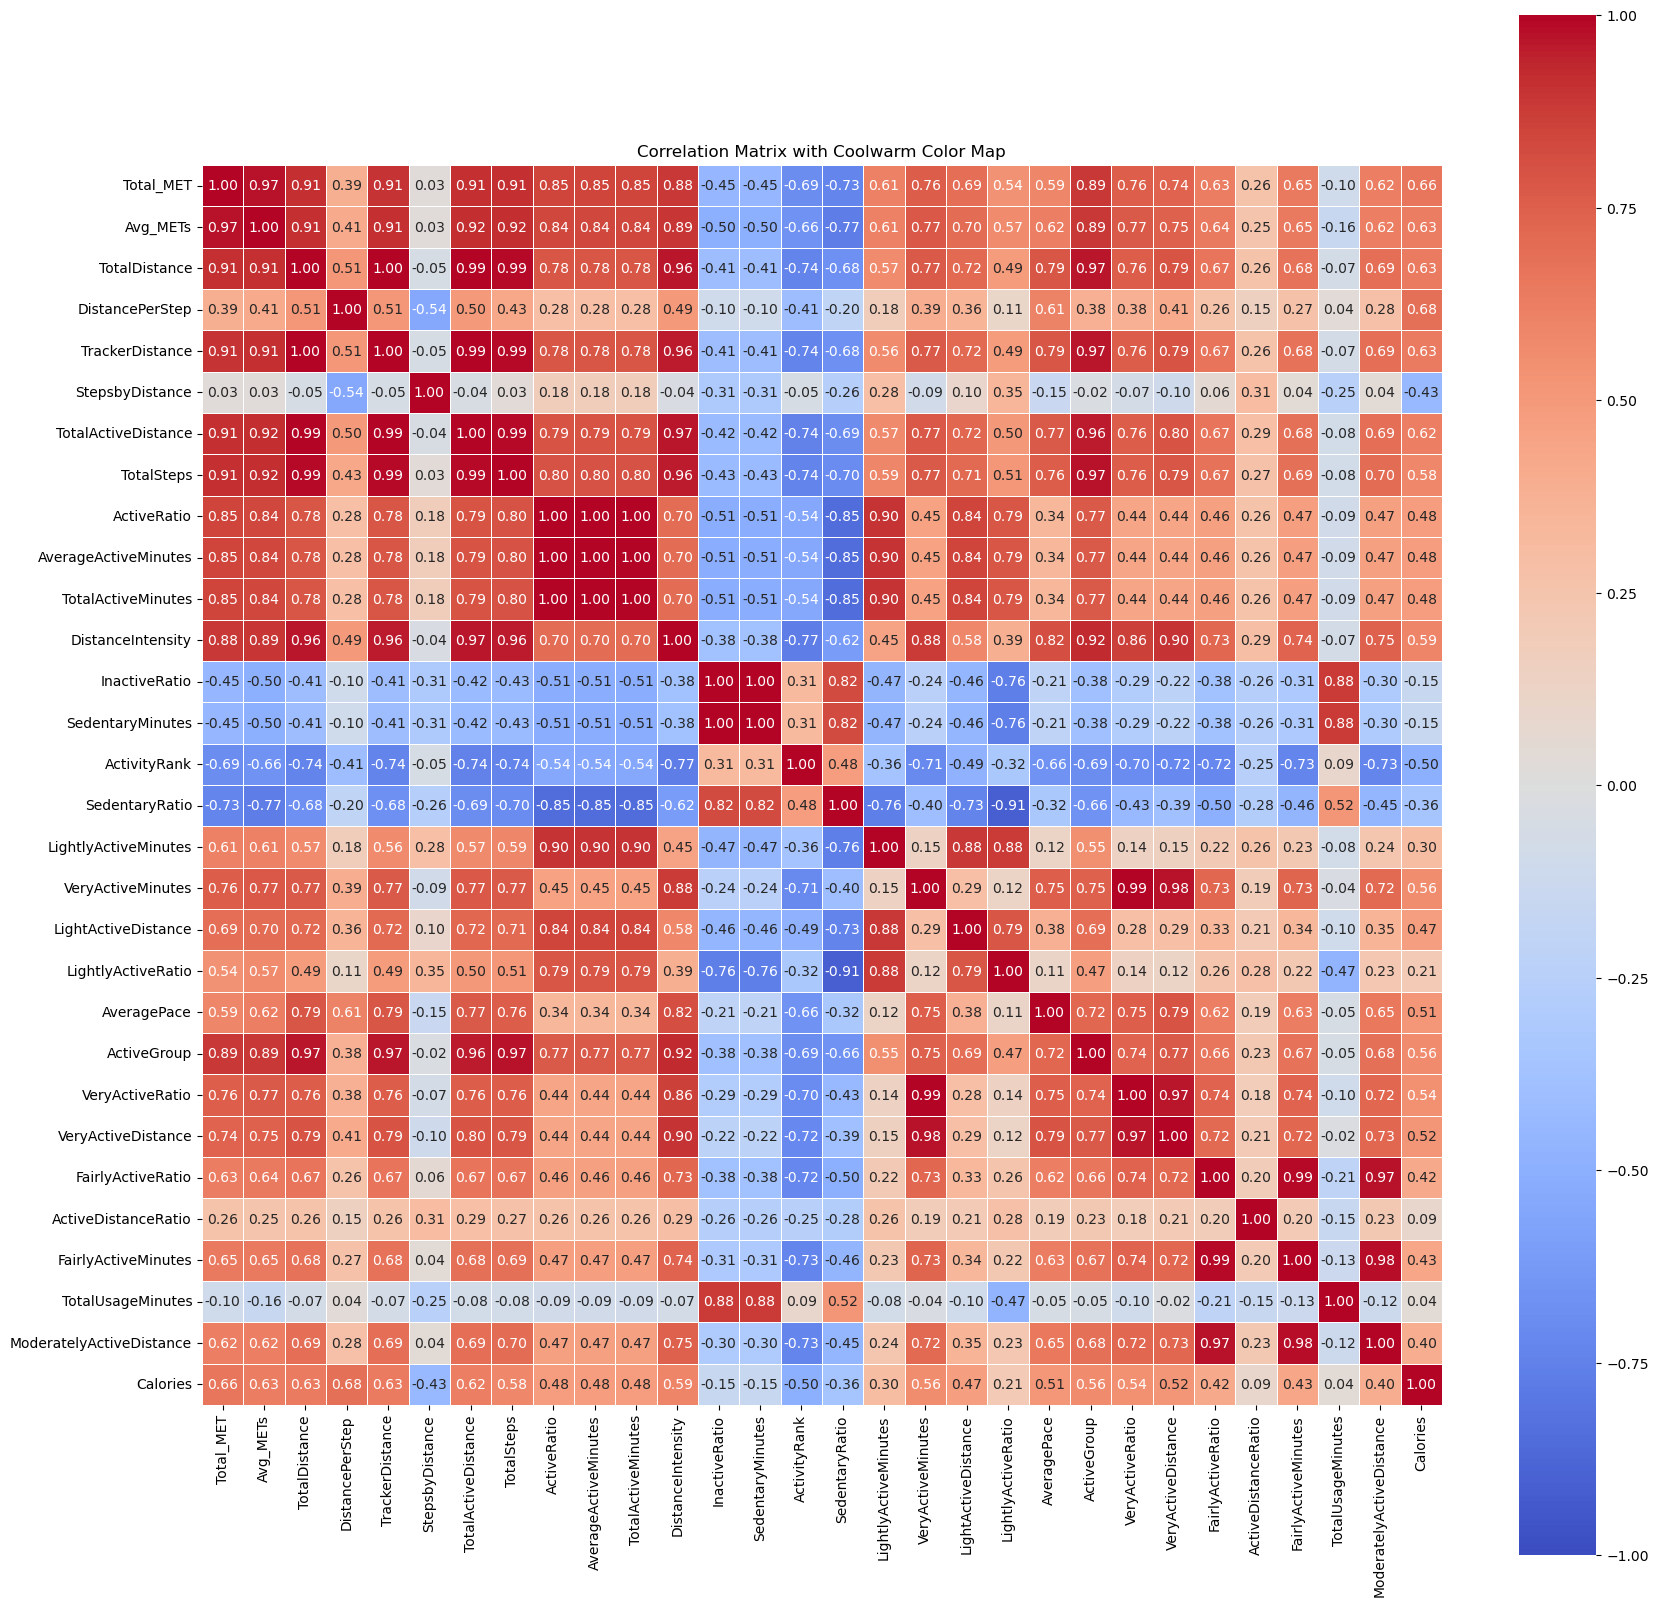

In [360]:
# Langkah 1: Hitung matriks korelasi
correlation_matrix = train.corr(method='spearman')

# Langkah 2: Plot matriks korelasi menggunakan seaborn dengan cmap 'coolwarm'
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=.5)
plt.title('Correlation Matrix with Coolwarm Color Map')
plt.show()

In [361]:
correlation_matrix

Total_MET  Avg_METs  TotalDistance  DistancePerStep  \
Total_MET                    1.0000    0.9692         0.9064           0.3888   
Avg_METs                     0.9692    1.0000         0.9106           0.4130   
TotalDistance                0.9064    0.9106         1.0000           0.5131   
DistancePerStep              0.3888    0.4130         0.5131           1.0000   
TrackerDistance              0.9060    0.9103         0.9997           0.5115   
StepsbyDistance              0.0310    0.0292        -0.0526          -0.5395   
TotalActiveDistance          0.9138    0.9189         0.9927           0.4972   
TotalSteps                   0.9120    0.9155         0.9922           0.4268   
ActiveRatio                  0.8451    0.8425         0.7834           0.2816   
AverageActiveMinutes         0.8451    0.8425         0.7834           0.2816   
TotalActiveMinutes           0.8451    0.8425         0.7834           0.2816   
DistanceIntensity            0.8842    0.8943         0.9611           0.4941   
InactiveRatio               -0.4489   -0.5044        -0.4108          -0.0956   
SedentaryMinutes            -0.4489   -0.5044        -0.4108          -0.0956   
ActivityRank                -0.6883   -0.6568        -0.7375          -0.4078   
SedentaryRatio              -0.7340   -0.7670        -0.6788          -0.1959   
LightlyActiveMinutes         0.6149    0.6133         0.5653           0.1761   
VeryActiveMinutes            0.7637    0.7748         0.7705           0.3924   
LightActiveDistance          0.6924    0.6998         0.7165           0.3572   
LightlyActiveRatio           0.5377    0.5657         0.4902           0.1071   
AveragePace                  0.5921    0.6187         0.7885           0.6061   
ActiveGroup                  0.8906    0.8886         0.9656           0.3761   
VeryActiveRatio              0.7554    0.7722         0.7597           0.3780   
VeryActiveDistance           0.7361    0.7470         0.7921           0.4074   
FairlyActiveRatio            0.6306    0.6436         0.6657           0.2592   
ActiveDistanceRatio          0.2617    0.2548         0.2638           0.1503   
FairlyActiveMinutes          0.6452    0.6479         0.6777           0.2725   
TotalUsageMinutes           -0.0980   -0.1552        -0.0731           0.0381   
ModeratelyActiveDistance     0.6185    0.6192         0.6910           0.2766   
Calories                     0.6610    0.6266         0.6330           0.6807   

                          TrackerDistance  StepsbyDistance  \
Total_MET                          0.9060           0.0310   
Avg_METs                           0.9103           0.0292   
TotalDistance                      0.9997          -0.0526   
DistancePerStep                    0.5115          -0.5395   
TrackerDistance                    1.0000          -0.0510   
StepsbyDistance                   -0.0510           1.0000   
TotalActiveDistance                0.9925          -0.0397   
TotalSteps                         0.9921           0.0338   
ActiveRatio                        0.7825           0.1758   
AverageActiveMinutes               0.7825           0.1758   
TotalActiveMinutes                 0.7825           0.1758   
DistanceIntensity                  0.9606          -0.0366   
InactiveRatio                     -0.4111          -0.3069   
SedentaryMinutes                  -0.4111          -0.3069   
ActivityRank                      -0.7372          -0.0489   
SedentaryRatio                    -0.6785          -0.2616   
LightlyActiveMinutes               0.5640           0.2814   
VeryActiveMinutes                  0.7699          -0.0889   
LightActiveDistance                0.7162           0.1003   
LightlyActiveRatio                 0.4894           0.3504   
AveragePace                        0.7886          -0.1456   
ActiveGroup                        0.9656          -0.0235   
VeryActiveRatio                    0.7593          -0.0746   
VeryActiveDistance        

In [362]:
# # Langkah 2: Tentukan threshold korelasi
# threshold = 0.7
# target = 'Calories'

# # Langkah 3: Temukan pasangan fitur dengan korelasi di atas threshold
# mask = (correlation_matrix.abs() > threshold) & (correlation_matrix != 1.0)
# high_corr_pairs = mask.stack().reset_index()
# high_corr_pairs = high_corr_pairs[high_corr_pairs[0]]
# high_corr_pairs.columns = ['Feature1', 'Feature2', 'AboveThreshold']

# # Langkah 4: Identifikasi fitur dengan korelasi lebih rendah dengan "Calories" dalam setiap pasangan
# to_drop = set()
# for _, row in high_corr_pairs.iterrows():
#     feature1, feature2 = row['Feature1'], row['Feature2']
    
#     # Jika fitur sudah di-drop, skip
#     if feature1 in to_drop or feature2 in to_drop:
#         continue
    
#     # Ambil korelasi dengan "Calories" untuk kedua fitur
#     corr_feature1 = correlation_matrix.at[feature1, target]
#     corr_feature2 = correlation_matrix.at[feature2, target]
    
#     # Simpan fitur yang memiliki korelasi lebih rendah dengan "Calories" untuk di-drop
#     if abs(corr_feature1) < abs(corr_feature2):
#         to_drop.add(feature1)
#     else:
#         to_drop.add(feature2)

# # Langkah 5: Buat DataFrame gabungan untuk fitur yang di-drop dan pasangan korelasinya
# combined_data = []
# for _, row in high_corr_pairs.iterrows():
#     feature1, feature2 = row['Feature1'], row['Feature2']
    
#     if feature1 in to_drop or feature2 in to_drop:
#         # Ambil korelasi masing-masing fitur dengan "Calories"
#         corr_feature1 = correlation_matrix.at[feature1, target]
#         corr_feature2 = correlation_matrix.at[feature2, target]
        
#         # Ambil korelasi antar fitur
#         corr_between_features = correlation_matrix.at[feature1, feature2]
        
#         combined_data.append({
#             'Dropped Feature': feature1 if feature1 in to_drop else feature2,
#             'Other Feature': feature1 if feature1 not in to_drop else feature2,
#             'Correlation with Calories Dropped Feature': corr_feature1 if feature1 in to_drop else corr_feature2,
#             'Correlation with Calories Other Feature': corr_feature2 if feature1 in to_drop else corr_feature1,
#             'Correlation Between Features': corr_between_features
#         })

# # Buat DataFrame dari data gabungan
# combined_df = pd.DataFrame(combined_data)

# # Urutkan berdasarkan korelasi antar fitur
# combined_df = combined_df.sort_values(by='Correlation Between Features', ascending=False).reset_index(drop=True)
# combined_df

In [363]:
# to_drop

In [364]:
# to_drop = set(to_drop)

In [365]:
# len(to_drop)

In [366]:
# to_drop = combined_df.head(7)['Dropped Feature'].to_list()
# to_drop

In [367]:
# to_drop = [
# 'Avg_METs',
# 'TotalDistance',
# 'TotalSteps',
# 'ActiveRatio',
# 'VeryActiveDistance',
# 'InactiveRatio',
# 'ActivityRank',
# 'SedentaryRatio',
# "TotalActiveMinutes",
# "SedentaryMinutes"
# ]

In [368]:
correlation_matrix = train.corr()

# Menginisialisasi daftar untuk fitur yang akan dihapus
to_drop = set()  # Menggunakan set untuk menghindari duplikasi

# Menentukan threshold korelasi
threshold = 0.95  # Threshold yang ingin diterapkan
print(f"Threshold korelasi: {threshold}")

# Kolom yang akan diperiksa, kecuali 'Calories'
checking = [x for x in correlation_matrix.columns if x != 'Calories']

# Iterasi untuk menemukan fitur dengan korelasi tinggi
for feature in checking:
    # Mencari fitur yang berkorelasi tinggi dengan fitur saat ini
    high_corr_features = correlation_matrix.index[abs(correlation_matrix[feature]) >= threshold].tolist()
    high_corr_features.remove(feature)  # Menghindari pencocokan dengan dirinya sendiri

    # Jika ada fitur berkorelasi tinggi
    if high_corr_features:
        print(f"\nFitur: {feature} berkorelasi tinggi dengan fitur: {high_corr_features}")
        
        # Menyimpan fitur yang akan dihapus
        to_drop.add(feature)  # Awalnya tambahkan fitur yang sedang dipertimbangkan untuk dihapus
        target_corr = correlation_matrix[feature]['Calories']
        print(f"Korelasi {feature} dengan Calories: {target_corr}")

        # Tentukan fitur mana yang akan dipertahankan
        for correlated_feature in high_corr_features:
            correlated_target_corr = correlation_matrix[correlated_feature]['Calories']
            print(f"Korelasi {correlated_feature} dengan Calories: {correlated_target_corr}")

            if abs(correlated_target_corr) > abs(target_corr):
                # Jika fitur berkorelasi tinggi memiliki korelasi target lebih besar, pertahankan itu
                print(f"Mempertahankan {correlated_feature} karena memiliki korelasi target lebih tinggi.")
                to_drop.discard(feature)  # Hapus dari daftar penghapusan
            else:
                # Hapus fitur yang memiliki korelasi target lebih rendah
                print(f"Menghapus {correlated_feature} karena memiliki korelasi target lebih rendah.")
                to_drop.add(correlated_feature)

# Print fitur yang akan dihapus
print("\nFitur yang akan dihapus:", to_drop)


Threshold korelasi: 0.95

Fitur: TotalDistance berkorelasi tinggi dengan fitur: ['TrackerDistance', 'TotalActiveDistance', 'TotalSteps']
Korelasi TotalDistance dengan Calories: 0.6521908266219413
Korelasi TrackerDistance dengan Calories: 0.6525996289095429
Mempertahankan TrackerDistance karena memiliki korelasi target lebih tinggi.
Korelasi TotalActiveDistance dengan Calories: 0.6352891943171637
Menghapus TotalActiveDistance karena memiliki korelasi target lebih rendah.
Korelasi TotalSteps dengan Calories: 0.6018335628227416
Menghapus TotalSteps karena memiliki korelasi target lebih rendah.

Fitur: TrackerDistance berkorelasi tinggi dengan fitur: ['TotalDistance', 'TotalActiveDistance', 'TotalSteps']
Korelasi TrackerDistance dengan Calories: 0.6525996289095429
Korelasi TotalDistance dengan Calories: 0.6521908266219413
Menghapus TotalDistance karena memiliki korelasi target lebih rendah.
Korelasi TotalActiveDistance dengan Calories: 0.6352891943171637
Menghapus TotalActiveDistance karen

In [369]:
# Menampilkan fitur yang akan dihapus
print(f"{len(to_drop)} Fitur yang dihapus:\n", to_drop)

8 Fitur yang dihapus:
 {'FairlyActiveRatio', 'InactiveRatio', 'AverageActiveMinutes', 'TrackerDistance', 'FairlyActiveMinutes', 'DistanceIntensity', 'TotalDistance', 'ActiveRatio'}


# Drop Columns

In [370]:
train = train.drop(columns=list(to_drop))
test = test.drop(columns=list(to_drop))

# Data Prep

In [371]:
# 1. Siapkan data
X_train = train.drop(columns=['Calories'])
y_train = train['Calories']
X_test = test.drop(columns=['Calories'])
y_test = test['Calories']


# Model: Baseline

## Import Libraries

In [372]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score


In [373]:
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    mean_absolute_percentage_error
)
import matplotlib.pyplot as plt
import time

## Evaluation Function

### Without CV

In [374]:
# def evaluate_model(model, model_name):
#     start_time = time.time()
#     model.fit(X_train, y_train)
#     y_pred_train = model.predict(X_train)
#     y_pred_test = model.predict(X_test)
#     end_time = time.time()
    
#     rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
#     rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
#     r2_train = r2_score(y_train, y_pred_train)
#     r2_test = r2_score(y_test, y_pred_test)
#     mae_train = mean_absolute_error(y_train, y_pred_train)
#     mae_test = mean_absolute_error(y_test, y_pred_test)
#     mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
#     mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

#     # Hitung residual
#     residuals_train = y_train - y_pred_train
#     mean_residual_train = np.mean(residuals_train)  # Rata-rata residual
#     residuals = y_test - y_pred_test
#     mean_residual = np.mean(residuals)  # Rata-rata residual

#     # Plot residual
#     plt.figure(figsize=(14, 6))

#     plt.subplot(1, 2, 1)
#     plt.scatter(y_pred_test, residuals, color='blue', alpha=0.5)
#     plt.axhline(y=0, color='red', linestyle='--')
#     plt.title('Residuals vs Predicted Values')
#     plt.xlabel('Predicted Values')
#     plt.ylabel('Residuals')
    
#     #y actual vs y predicted
#     plt.subplot(1, 2, 2)
#     plt.scatter(y_test, y_pred_test, color='green', alpha=0.5)
#     plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis diagonal
#     plt.title('Actual vs Predicted Values')
#     plt.xlabel('Actual Values')
#     plt.ylabel('Predicted Values')
    
#     plt.tight_layout()
#     plt.show()

#     training_time = end_time - start_time

#     return {
#         'Model': model_name,
#         'Training Time (s)': training_time,
#         'RMSE Train': rmse_train,
#         'RMSE Test': rmse_test,
#         'R2 Train': r2_train,
#         'R2 Test': r2_test,
#         'MAE Train': mae_train,
#         'MAE Test': mae_test,
#         'Mean Residual Train': mean_residual_train,  # Rata-rata residual
#         'Mean Residual Test': mean_residual,  # Rata-rata residual
#         'MAPE Train': mape_train,
#         'MAPE Test': mape_test
#     }

# results = []

### With CV

In [375]:
# def evaluate_model(model, model_name):
#     start_time = time.time()
    
#     # Melatih model
#     model.fit(X_train, y_train)
    
#     # Prediksi pada train dan test set
#     y_pred_train = model.predict(X_train)
#     y_pred_test = model.predict(X_test)
    
#     # Menghitung waktu pelatihan
#     end_time = time.time()
#     training_time = end_time - start_time

#     # Metrik untuk train set
#     rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
#     r2_train = r2_score(y_train, y_pred_train)
#     mae_train = mean_absolute_error(y_train, y_pred_train)
#     mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
    
#     # Metrik untuk test set
#     rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
#     r2_test = r2_score(y_test, y_pred_test)
#     mae_test = mean_absolute_error(y_test, y_pred_test)
#     mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

#     # Hitung residual
#     residuals_train = y_train - y_pred_train
#     mean_residual_train = np.mean(residuals_train)  # Rata-rata residual
#     residuals = y_test - y_pred_test
#     mean_residual = np.mean(residuals)  # Rata-rata residual

#     # Cross-validation scores untuk train set
#     cv_rmse_train = np.sqrt(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=3))
#     cv_r2_train = cross_val_score(model, X_train, y_train, scoring='r2', cv=3)
#     cv_mae_train = -cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)
#     cv_mape_train = -cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_percentage_error', cv=3)

#     # Rata-rata metrik cross-validation untuk train set
#     cv_rmse_train_mean = np.mean(cv_rmse_train)
#     cv_r2_train_mean = np.mean(cv_r2_train)
#     cv_mae_train_mean = np.mean(cv_mae_train)
#     cv_mape_train_mean = np.mean(cv_mape_train)

#     # Cross-validation scores untuk test set (karena kita tidak memiliki label asli di dalam test set)
#     cv_rmse_test = np.sqrt(-cross_val_score(model, X_test, y_test, scoring='neg_mean_squared_error', cv=3))
#     cv_r2_test = cross_val_score(model, X_test, y_test, scoring='r2', cv=3)
#     cv_mae_test = -cross_val_score(model, X_test, y_test, scoring='neg_mean_absolute_error', cv=3)
#     cv_mape_test = -cross_val_score(model, X_test, y_test, scoring='neg_mean_absolute_percentage_error', cv=3)

#     # Rata-rata metrik cross-validation untuk test set
#     cv_rmse_test_mean = np.mean(cv_rmse_test)
#     cv_r2_test_mean = np.mean(cv_r2_test)
#     cv_mae_test_mean = np.mean(cv_mae_test)
#     cv_mape_test_mean = np.mean(cv_mape_test)

#     # Plot residual
#     plt.figure(figsize=(14, 6))

#     plt.subplot(1, 2, 1)
#     plt.scatter(y_pred_test, residuals, color='blue', alpha=0.5)
#     plt.axhline(y=0, color='red', linestyle='--')
#     plt.title('Residuals vs Predicted Values')
#     plt.xlabel('Predicted Values')
#     plt.ylabel('Residuals')
    
#     # Y actual vs Y predicted
#     plt.subplot(1, 2, 2)
#     plt.scatter(y_test, y_pred_test, color='green', alpha=0.5)
#     plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis diagonal
#     plt.title('Actual vs Predicted Values')
#     plt.xlabel('Actual Values')
#     plt.ylabel('Predicted Values')
    
#     plt.tight_layout()
#     plt.show()

#     return {
#         'Model': model_name,
#         'Training Time (s)': training_time,
#         'RMSE Train': cv_rmse_train_mean, 
#         'R2 Train': cv_r2_train_mean,
#         'MAE Train': cv_mae_train_mean,
#         'MAPE Train': cv_mape_train_mean,
#         'RMSE Test': cv_rmse_test_mean, 
#         'R2 Test': cv_r2_test_mean,    
#         'MAE Test': cv_mae_test_mean,       
#         'Mean Residual Train': mean_residual_train,
#         'Mean Residual Test': mean_residual,        
#         'MAPE Test': cv_mape_test_mean              
#     }

# results = []

In [376]:
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
# from sklearn.model_selection import cross_val_score, cross_val_predict
# import numpy as np
# import matplotlib.pyplot as plt
# import time

# def evaluate_model(model, model_name):
#     start_time = time.time()

#     # Cross-validation pada train set
#     y_cv_train_pred = cross_val_predict(model, X_train, y_train, cv=3)
#     cv_rmse_train = np.sqrt(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=3))
#     cv_r2_train = cross_val_score(model, X_train, y_train, scoring='r2', cv=3)
#     cv_mae_train = -cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)
#     cv_mape_train = -cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_percentage_error', cv=3)

#     # Latih model pada keseluruhan train set
#     model.fit(X_train, y_train)
#     training_time = time.time() - start_time

#     # Prediksi pada train dan test set
#     y_pred_train = model.predict(X_train)
#     y_pred_test = model.predict(X_test)

#     # Metrik untuk train set tanpa CV
#     # rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
#     # r2_train = r2_score(y_train, y_pred_train)
#     # mae_train = mean_absolute_error(y_train, y_pred_train)
#     # mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

#     # Metrik untuk test set
#     rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
#     r2_test = r2_score(y_test, y_pred_test)
#     mae_test = mean_absolute_error(y_test, y_pred_test)
#     mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

#     # Residuals untuk train dan test set
#     residuals_train = y_train - y_pred_train
#     residuals_test = y_test - y_pred_test

#     # Plot residual untuk train dan test
#     plt.figure(figsize=(18, 6))

#     # Plot residual train
#     plt.subplot(1, 3, 1)
#     plt.scatter(y_pred_train, residuals_train, color='blue', alpha=0.5)
#     plt.axhline(y=0, color='red', linestyle='--')
#     plt.title('Train Residuals')
#     plt.xlabel('Predicted Values (Train)')
#     plt.ylabel('Residuals (Train)')

#     # Plot residual test
#     plt.subplot(1, 3, 2)
#     plt.scatter(y_pred_test, residuals_test, color='green', alpha=0.5)
#     plt.axhline(y=0, color='red', linestyle='--')
#     plt.title('Test Residuals')
#     plt.xlabel('Predicted Values (Test)')
#     plt.ylabel('Residuals (Test)')

#     # Plot Actual vs Predicted
#     plt.subplot(1, 3, 3)
#     plt.scatter(y_test, y_pred_test, color='purple', alpha=0.5)
#     plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis diagonal
#     plt.title('Actual vs Predicted Values')
#     plt.xlabel('Actual Values')
#     plt.ylabel('Predicted Values')

#     plt.tight_layout()
#     plt.show()

#     # Hasil akhir sebagai dictionary
#     return {
#         'Model': model_name,
#         'Training Time (s)': training_time,
#         'Train RMSE': np.mean(cv_rmse_train),  # RMSE dari CV untuk train
#         'Train R2': np.mean(cv_r2_train),
#         'Train MAE': np.mean(cv_mae_train),
#         'Train MAPE': np.mean(cv_mape_train),
#         'Test RMSE': rmse_test,
#         'Test R2': r2_test,
#         'Test MAE': mae_test,
#         'Test MAPE': mape_test,
#         'Residual Mean Train': np.mean(residuals_train),
#         'Residual Mean Test': np.mean(residuals_test)
#     }

# # Contoh penggunaan
# results = []


In [377]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import time
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
# from sklearn.model_selection import cross_validate

# def evaluate_model(model, model_name):
#     start_time = time.time()
    
#     # Cross-validate the model
#     cv_results = cross_validate(model, X_train, y_train, cv=3, 
#                                 scoring=['neg_mean_squared_error', 'r2', 'neg_mean_absolute_error', 
#                                          'neg_mean_absolute_percentage_error'], 
#                                 return_train_score=True)

#     # Calculate metrics from cross-validation results
#     rmse_train = np.sqrt(-np.mean(cv_results['train_neg_mean_squared_error']))
#     rmse_test = np.sqrt(mean_squared_error(y_test, model.fit(X_train, y_train).predict(X_test)))
#     r2_train = np.mean(cv_results['train_r2'])
#     r2_test = r2_score(y_test, model.predict(X_test))
#     mae_train = -np.mean(cv_results['train_neg_mean_absolute_error'])
#     mae_test = mean_absolute_error(y_test, model.predict(X_test))
#     mape_train = -np.mean(cv_results['train_neg_mean_absolute_percentage_error'])
#     mape_test = mean_absolute_percentage_error(y_test, model.predict(X_test))

#     # Hitung residual
#     y_pred_train = model.predict(X_train)
#     y_pred_test = model.predict(X_test)
#     residuals_train = y_train - y_pred_train
#     mean_residual_train = np.mean(residuals_train)  # Rata-rata residual
#     residuals_test = y_test - y_pred_test
#     mean_residual_test = np.mean(residuals_test)  # Rata-rata residual

#     # Plot residual
#     plt.figure(figsize=(14, 6))

#     # Residuals vs Predicted Values
#     plt.subplot(1, 2, 1)
#     plt.scatter(y_pred_test, residuals_test, color='blue', alpha=0.5)
#     plt.axhline(y=0, color='red', linestyle='--')
#     plt.title('Residuals vs Predicted Values')
#     plt.xlabel('Predicted Values')
#     plt.ylabel('Residuals')
    
#     # Actual vs Predicted Values
#     plt.subplot(1, 2, 2)
#     plt.scatter(y_test, y_pred_test, color='green', alpha=0.5)
#     plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis diagonal
#     plt.title('Actual vs Predicted Values')
#     plt.xlabel('Actual Values')
#     plt.ylabel('Predicted Values')
    
#     plt.tight_layout()
#     plt.show()

#     end_time = time.time()
#     training_time = end_time - start_time

#     return {
#         'Model': model_name,
#         'Training Time (s)': training_time,
#         'RMSE Train': rmse_train,
#         'RMSE Test': rmse_test,
#         'R2 Train': r2_train,
#         'R2 Test': r2_test,
#         'MAE Train': mae_train,
#         'MAE Test': mae_test,
#         'Mean Residual Train': mean_residual_train,  # Rata-rata residual
#         'Mean Residual Test': mean_residual_test,  # Rata-rata residual
#         'MAPE Train': mape_train,
#         'MAPE Test': mape_test
#     }

# results = []


In [378]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import time
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
# from sklearn.model_selection import KFold

# def evaluate_model(model, model_name):
#     start_time = time.time()
    
#     # Inisialisasi K-Fold
#     kf = KFold(n_splits=3, shuffle=True, random_state=42)
    
#     rmse_train_list = []
#     r2_train_list = []
#     mae_train_list = []
#     mape_train_list = []
    
#     # K-Fold Cross Validation
#     for train_index, val_index in kf.split(X_train):
#         X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
#         y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        
#         # Latih model pada lipatan
#         model.fit(X_train_fold, y_train_fold)
#         y_train_pred = model.predict(X_train_fold)
#         y_val_pred = model.predict(X_val_fold)
        
#         # Hitung metrik untuk lipatan
#         rmse_train_list.append(np.sqrt(mean_squared_error(y_train_fold, y_train_pred)))
#         r2_train_list.append(r2_score(y_train_fold, y_train_pred))
#         mae_train_list.append(mean_absolute_error(y_train_fold, y_train_pred))
#         mape_train_list.append(mean_absolute_percentage_error(y_train_fold, y_train_pred))

#     # Rata-rata metrik untuk data latih
#     rmse_train = np.mean(rmse_train_list)
#     r2_train = np.mean(r2_train_list)
#     mae_train = np.mean(mae_train_list)
#     mape_train = np.mean(mape_train_list)

#     # Latih model dengan semua data latih untuk evaluasi
#     model.fit(X_train, y_train)
    
#     # Hitung prediksi untuk data uji
#     y_test_pred = model.predict(X_test)
    
#     # Hitung metrik untuk data uji
#     rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
#     r2_test = r2_score(y_test, y_test_pred)
#     mae_test = mean_absolute_error(y_test, y_test_pred)
#     mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

#     # Hitung residual untuk data latih dan data uji
#     y_train_pred = model.predict(X_train)  # Prediksi pada seluruh data latih
#     residuals_train = y_train - y_train_pred
#     residuals_test = y_test - y_test_pred
#     mean_residual_train = np.mean(residuals_train)
#     mean_residual_test = np.mean(residuals_test)

#     # Plot residual
#     plt.figure(figsize=(14, 6))

#     # Residuals vs Predicted Values (data uji)
#     plt.subplot(1, 2, 1)
#     plt.scatter(y_test_pred, residuals_test, color='blue', alpha=0.5)
#     plt.axhline(y=0, color='red', linestyle='--')
#     plt.title('Residuals vs Predicted Values (Test)')
#     plt.xlabel('Predicted Values')
#     plt.ylabel('Residuals')
    
#     # Actual vs Predicted Values (data uji)
#     plt.subplot(1, 2, 2)
#     plt.scatter(y_test, y_test_pred, color='green', alpha=0.5)
#     plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis diagonal
#     plt.title('Actual vs Predicted Values (Test)')
#     plt.xlabel('Actual Values')
#     plt.ylabel('Predicted Values')
    
#     plt.tight_layout()
#     plt.show()

#     # Plot residuals untuk data latih
#     plt.figure(figsize=(8, 6))
#     plt.scatter(y_train_pred, residuals_train, color='orange', alpha=0.5)
#     plt.axhline(y=0, color='red', linestyle='--')
#     plt.title('Residuals vs Predicted Values (Train)')
#     plt.xlabel('Predicted Values (Train)')
#     plt.ylabel('Residuals (Train)')
#     plt.show()

#     end_time = time.time()
#     training_time = end_time - start_time

#     return {
#         'Model': model_name,
#         'Training Time (s)': training_time,
#         'RMSE Train': rmse_train,
#         'RMSE Test': rmse_test,
#         'R2 Train': r2_train,
#         'R2 Test': r2_test,
#         'MAE Train': mae_train,
#         'MAE Test': mae_test,
#         'Mean Residual Train': mean_residual_train,
#         'Mean Residual Test': mean_residual_test,
#         'MAPE Train': mape_train,
#         'MAPE Test': mape_test
#     }

# results = []


In [379]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import KFold

def evaluate_model(model, model_name):
    start_time = time.time()
    
    # Inisialisasi K-Fold
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    
    rmse_train_list = []
    r2_train_list = []
    mae_train_list = []
    mape_train_list = []
    
    # K-Fold Cross Validation
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Latih model pada lipatan
        model.fit(X_train_fold, y_train_fold)
        y_train_pred = model.predict(X_train_fold)
        y_val_pred = model.predict(X_val_fold)
        
        # Hitung metrik untuk lipatan
        rmse_train_list.append(np.sqrt(mean_squared_error(y_train_fold, y_train_pred)))
        r2_train_list.append(r2_score(y_train_fold, y_train_pred))
        mae_train_list.append(mean_absolute_error(y_train_fold, y_train_pred))
        mape_train_list.append(mean_absolute_percentage_error(y_train_fold, y_train_pred))

    # Rata-rata metrik untuk data latih
    rmse_train = np.mean(rmse_train_list)
    r2_train = np.mean(r2_train_list)
    mae_train = np.mean(mae_train_list)
    mape_train = np.mean(mape_train_list)

    # Latih model dengan semua data latih untuk evaluasi
    model.fit(X_train, y_train)
    
    # Hitung prediksi untuk data uji
    y_test_pred = model.predict(X_test)
    
    # Hitung metrik untuk data uji
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

    # Hitung residual untuk data latih dan data uji
    y_train_pred = model.predict(X_train)  # Prediksi pada seluruh data latih
    residuals_train = y_train - y_train_pred
    residuals_test = y_test - y_test_pred
    mean_residual_train = np.mean(residuals_train)
    mean_residual_test = np.mean(residuals_test)

    # Plot residual
    plt.figure(figsize=(14, 6))

    # Plot residual dan nilai aktual vs prediksi
    plt.figure(figsize=(20, 6))

    # Residuals vs Predicted Values (data latih)
    plt.subplot(1, 3, 1)
    plt.scatter(y_train_pred, residuals_train, color='orange', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Residuals vs Predicted Values (Train)')
    plt.xlabel('Predicted Values (Train)')
    plt.ylabel('Residuals (Train)')
    
    # Residuals vs Predicted Values (data uji)
    plt.subplot(1, 3, 2)
    plt.scatter(y_test_pred, residuals_test, color='blue', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Residuals vs Predicted Values (Test)')
    plt.xlabel('Predicted Values (Test)')
    plt.ylabel('Residuals (Test)')
    
    # Actual vs Predicted Values (data uji)
    plt.subplot(1, 3, 3)
    plt.scatter(y_test, y_test_pred, color='green', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis diagonal
    plt.title('Actual vs Predicted Values (Test)')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

    plt.tight_layout()
    plt.show()

    end_time = time.time()
    training_time = end_time - start_time

    return {
        'Model': model_name,
        'Training Time (s)': training_time,
        'RMSE Train': rmse_train,
        'RMSE Test': rmse_test,
        'R2 Train': r2_train,
        'R2 Test': r2_test,
        'MAE Train': mae_train,
        'MAE Test': mae_test,
        'Mean Residual Train': mean_residual_train,
        'Mean Residual Test': mean_residual_test,
        'MAPE Train': mape_train,
        'MAPE Test': mape_test
    }

results = []


## Random Forest

<Figure size 1400x600 with 0 Axes>

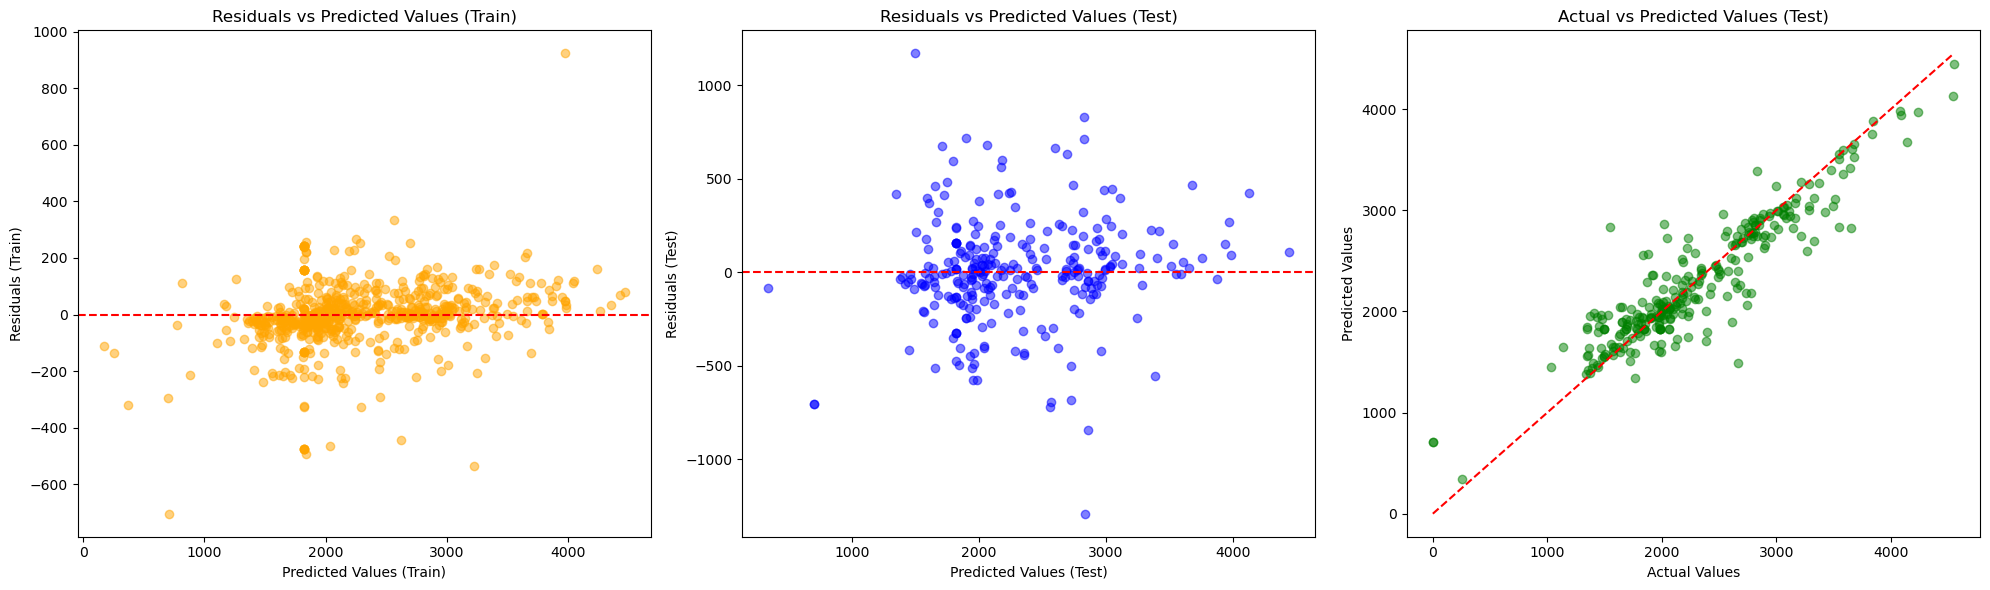

{'Model': 'Random Forest',
 'Training Time (s)': 3.7308340072631836,
 'RMSE Train': 122.00755626123568,
 'RMSE Test': 283.596041106028,
 'R2 Train': 0.970848401641601,
 'R2 Test': 0.8407827429424681,
 'MAE Train': 80.40558640522364,
 'MAE Test': 194.65901632674377,
 'Mean Residual Train': -3.6966318583996975,
 'Mean Residual Test': 3.140271215164148,
 'MAPE Train': 4171653249832884.5,
 'MAPE Test': 2.250490256346793e+16}

In [380]:
rf_results = evaluate_model(RandomForestRegressor(random_state=42), 'Random Forest')
results.append(rf_results)
rf_results

## Linear Regression

<Figure size 1400x600 with 0 Axes>

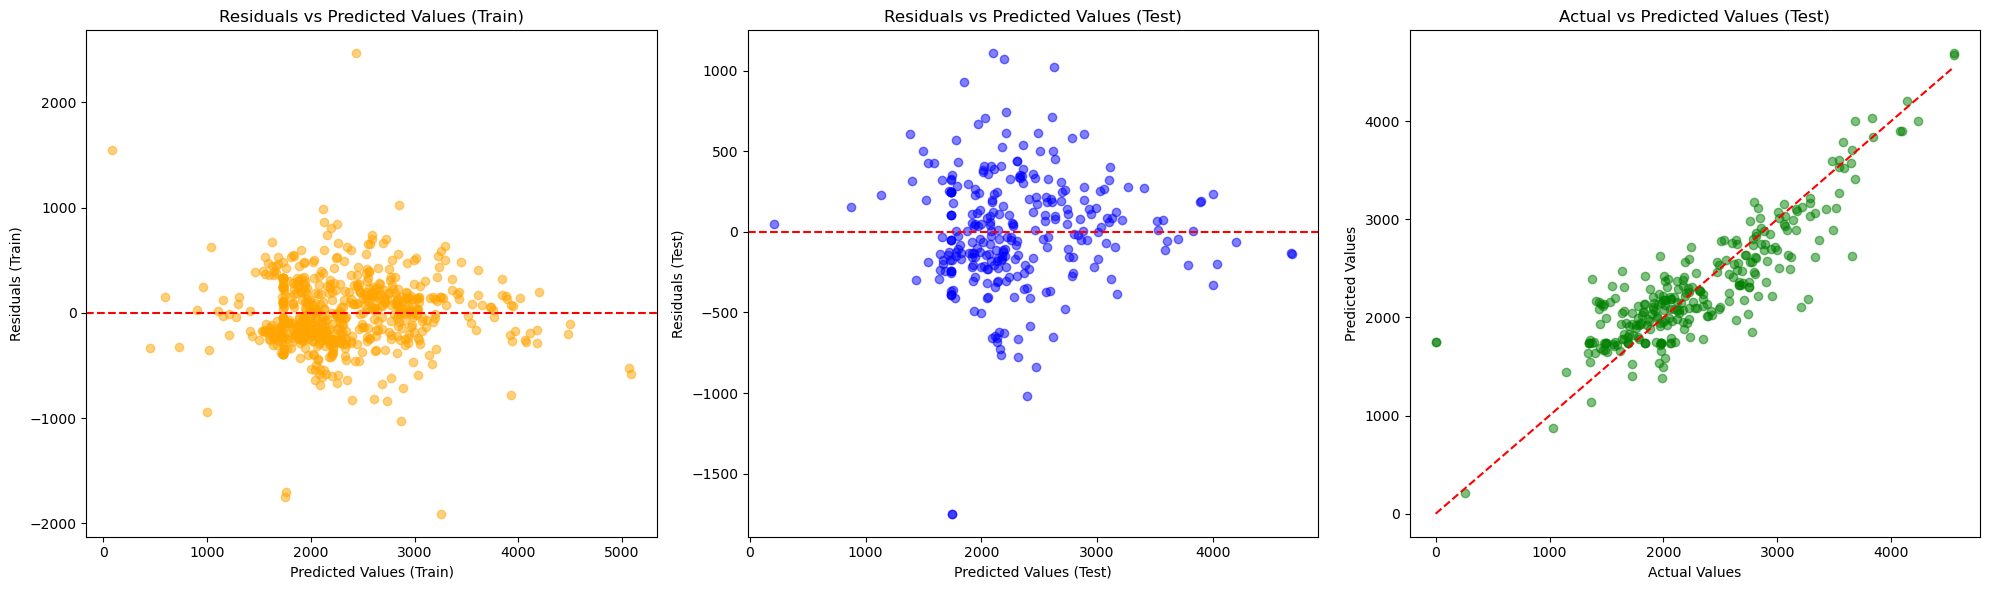

{'Model': 'Linear Regression',
 'Training Time (s)': 0.6941556930541992,
 'RMSE Train': 326.16702722086467,
 'RMSE Test': 358.00005636948123,
 'R2 Train': 0.7919655135772287,
 'R2 Test': 0.7462792421820305,
 'MAE Train': 242.66859921853373,
 'MAE Test': 264.58901025336814,
 'Mean Residual Train': 1.7303932682133337e-13,
 'Mean Residual Test': -1.854804498286729,
 'MAPE Train': 1.1461632519938336e+16,
 'MAPE Test': 5.583255870251702e+16}

In [381]:
lr_results = evaluate_model(LinearRegression(), 'Linear Regression')
results.append(lr_results)
lr_results

## Ridge

<Figure size 1400x600 with 0 Axes>

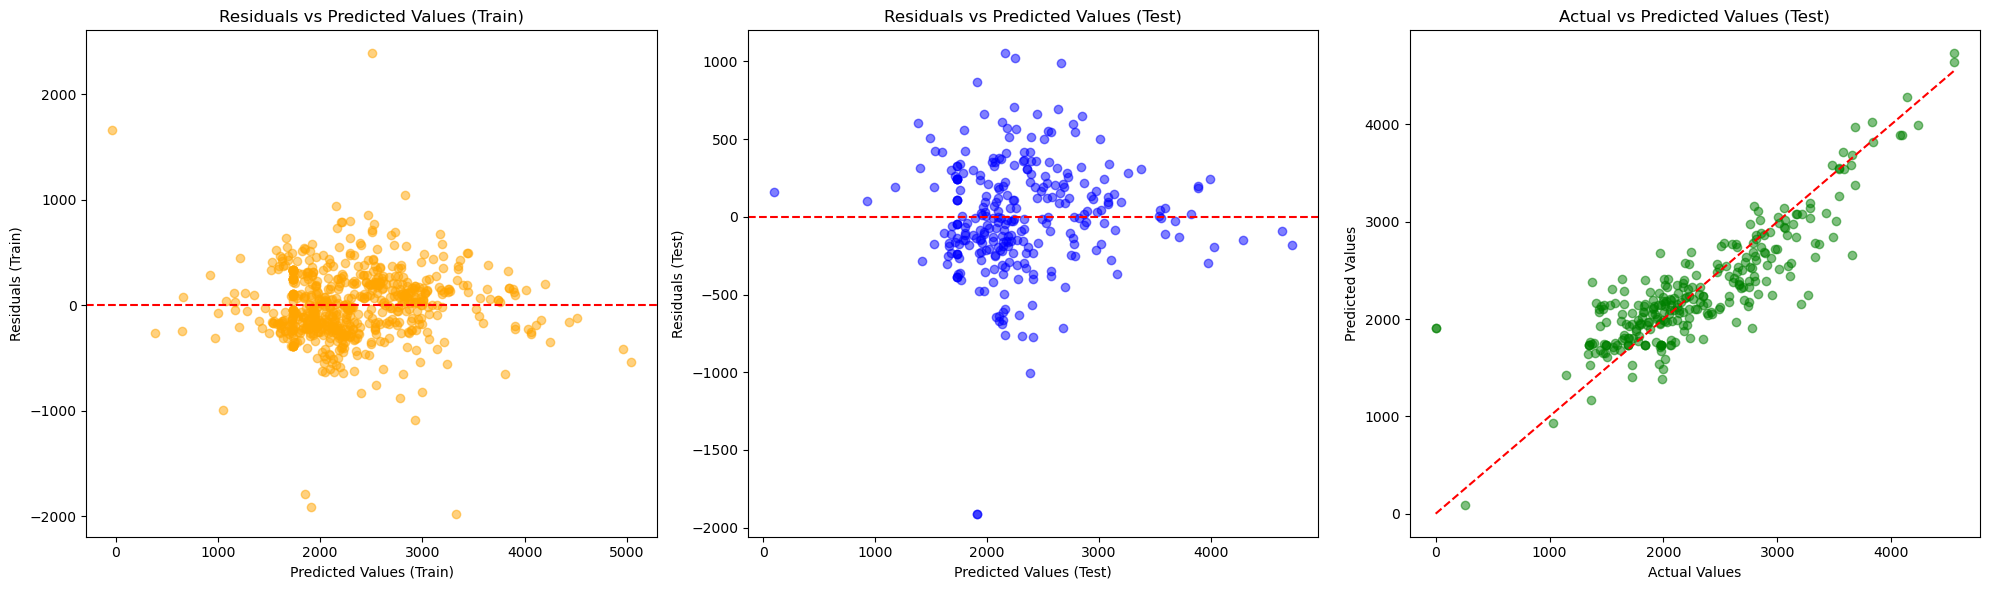

{'Model': 'Ridge',
 'Training Time (s)': 0.6991608142852783,
 'RMSE Train': 331.22948576716266,
 'RMSE Test': 362.5299025031534,
 'R2 Train': 0.7854137255677021,
 'R2 Test': 0.7398178618803539,
 'MAE Train': 243.9937305184285,
 'MAE Test': 265.93563886926813,
 'Mean Residual Train': 4.180630136003414e-13,
 'Mean Residual Test': -1.2706154803424732,
 'MAPE Train': 1.2809362821878022e+16,
 'MAPE Test': 6.100848866599147e+16}

In [382]:
ridge_results = evaluate_model(Ridge(random_state=42), 'Ridge')
results.append(ridge_results)
ridge_results

## Lasso

c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.610e+05, tolerance: 2.288e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.103e+05, tolerance: 2.406e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.566e+04, tolerance: 

<Figure size 1400x600 with 0 Axes>

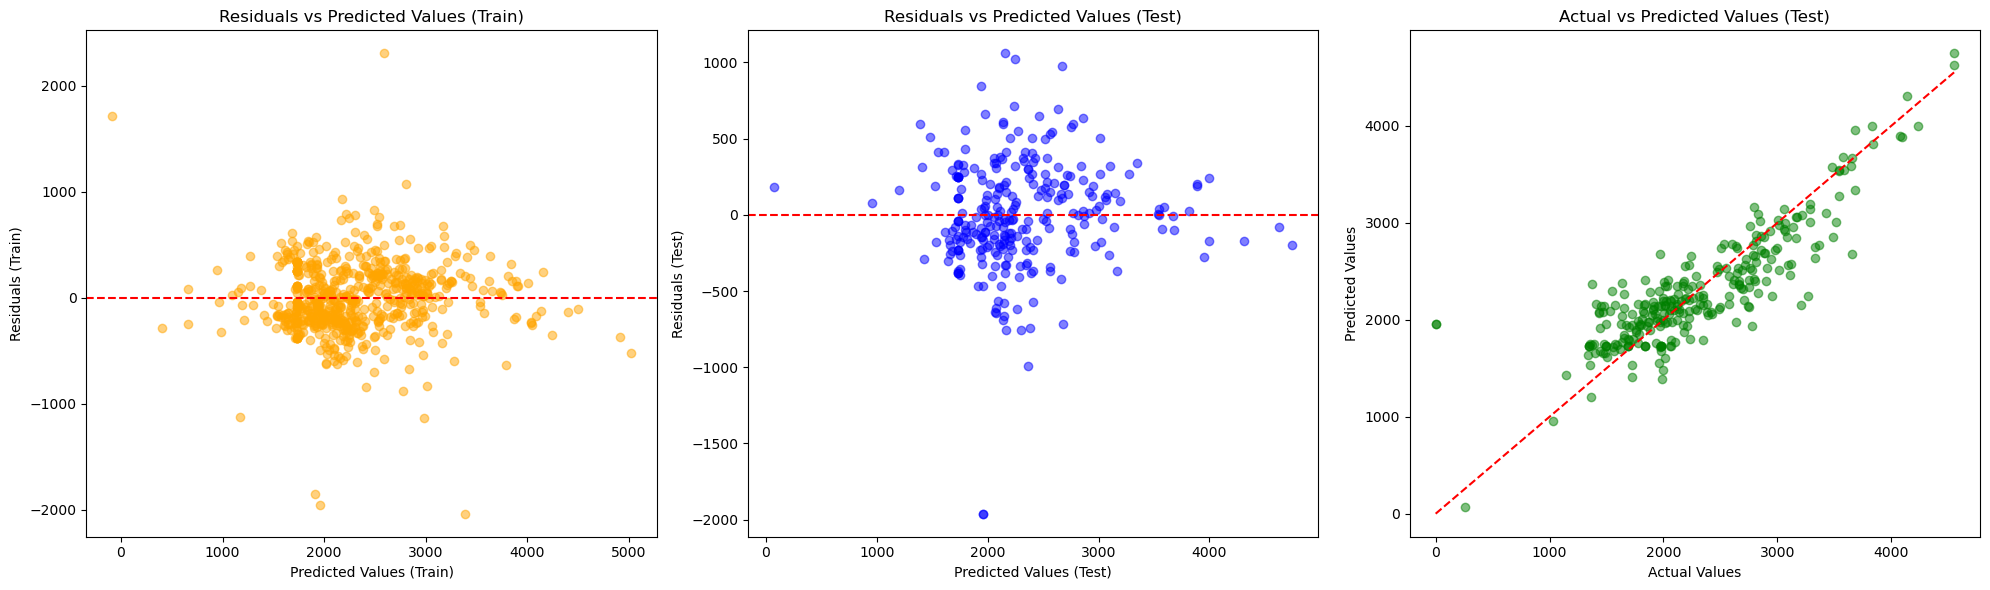

{'Model': 'Lasso',
 'Training Time (s)': 0.7507126331329346,
 'RMSE Train': 331.5738485426059,
 'RMSE Test': 362.0920181756366,
 'R2 Train': 0.7849585605682822,
 'R2 Test': 0.7404460079968962,
 'MAE Train': 244.43032940931366,
 'MAE Test': 265.12449785953226,
 'Mean Residual Train': 1.2528047261864536e-13,
 'Mean Residual Test': -0.3587095359314115,
 'MAPE Train': 1.2842302027583322e+16,
 'MAPE Test': 6.263095648504647e+16}

In [383]:
lasso_results = evaluate_model(Lasso(random_state=42), 'Lasso')
results.append(lasso_results)
lasso_results

## Elastic Net

<Figure size 1400x600 with 0 Axes>

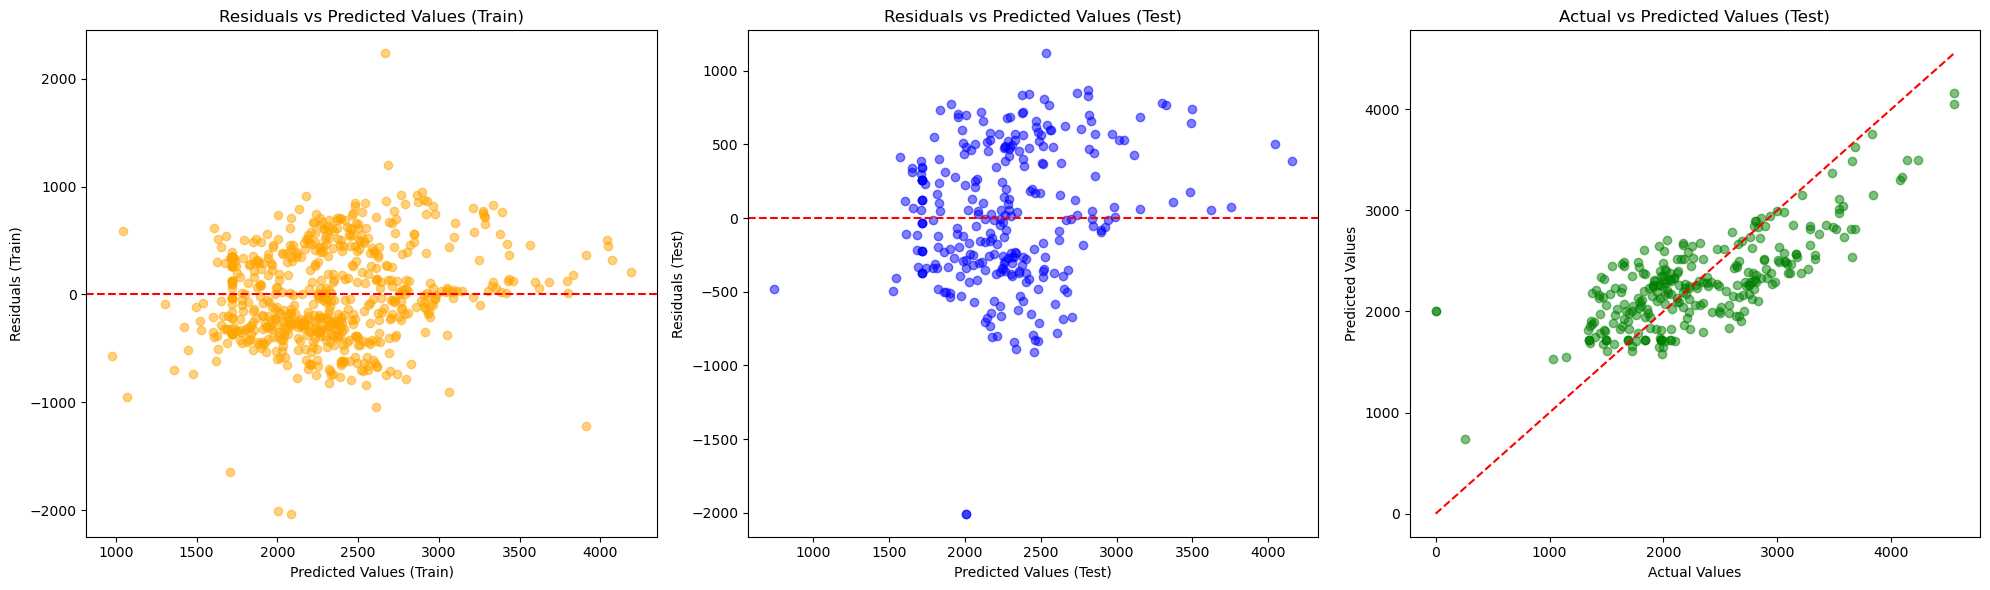

{'Model': 'Elastic Net',
 'Training Time (s)': 0.6771504878997803,
 'RMSE Train': 441.78699047247346,
 'RMSE Test': 469.1041393630722,
 'R2 Train': 0.6172846149043715,
 'R2 Test': 0.5643594073710153,
 'MAE Train': 357.1648175015395,
 'MAE Test': 381.77388560551583,
 'Mean Residual Train': 1.3289420299878403e-13,
 'Mean Residual Test': 20.74780552278285,
 'MAPE Train': 1.3655641533571536e+16,
 'MAPE Test': 6.408675374892625e+16}

In [384]:
elastic_net_results = evaluate_model(ElasticNet(random_state=42), 'Elastic Net')
results.append(elastic_net_results)
elastic_net_results

## Decision Tree

<Figure size 1400x600 with 0 Axes>

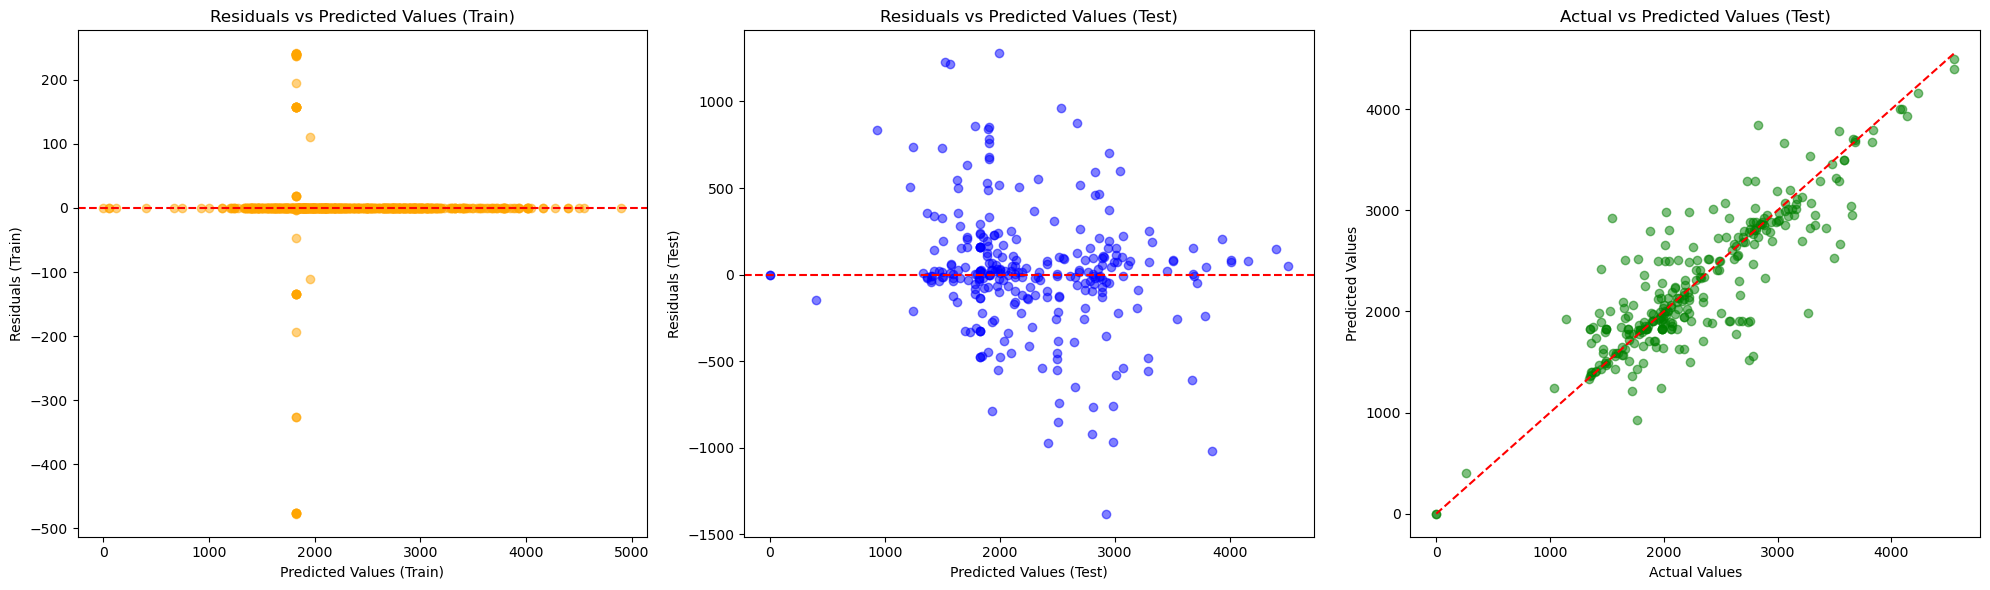

{'Model': 'Decision Tree',
 'Training Time (s)': 0.7087838649749756,
 'RMSE Train': 62.75153327964148,
 'RMSE Test': 355.21740511134055,
 'R2 Train': 0.9923046372362894,
 'R2 Test': 0.7502081384086214,
 'MAE Train': 13.566958295819894,
 'MAE Test': 230.7993138442023,
 'Mean Residual Train': 5.191179804640001e-15,
 'Mean Residual Test': 18.935161160122245,
 'MAPE Train': 0.008080547056358725,
 'MAPE Test': 0.10861153703803986}

In [385]:
dt_results = evaluate_model(DecisionTreeRegressor(random_state=42), 'Decision Tree')
results.append(dt_results)
dt_results

## XGBoost

<Figure size 1400x600 with 0 Axes>

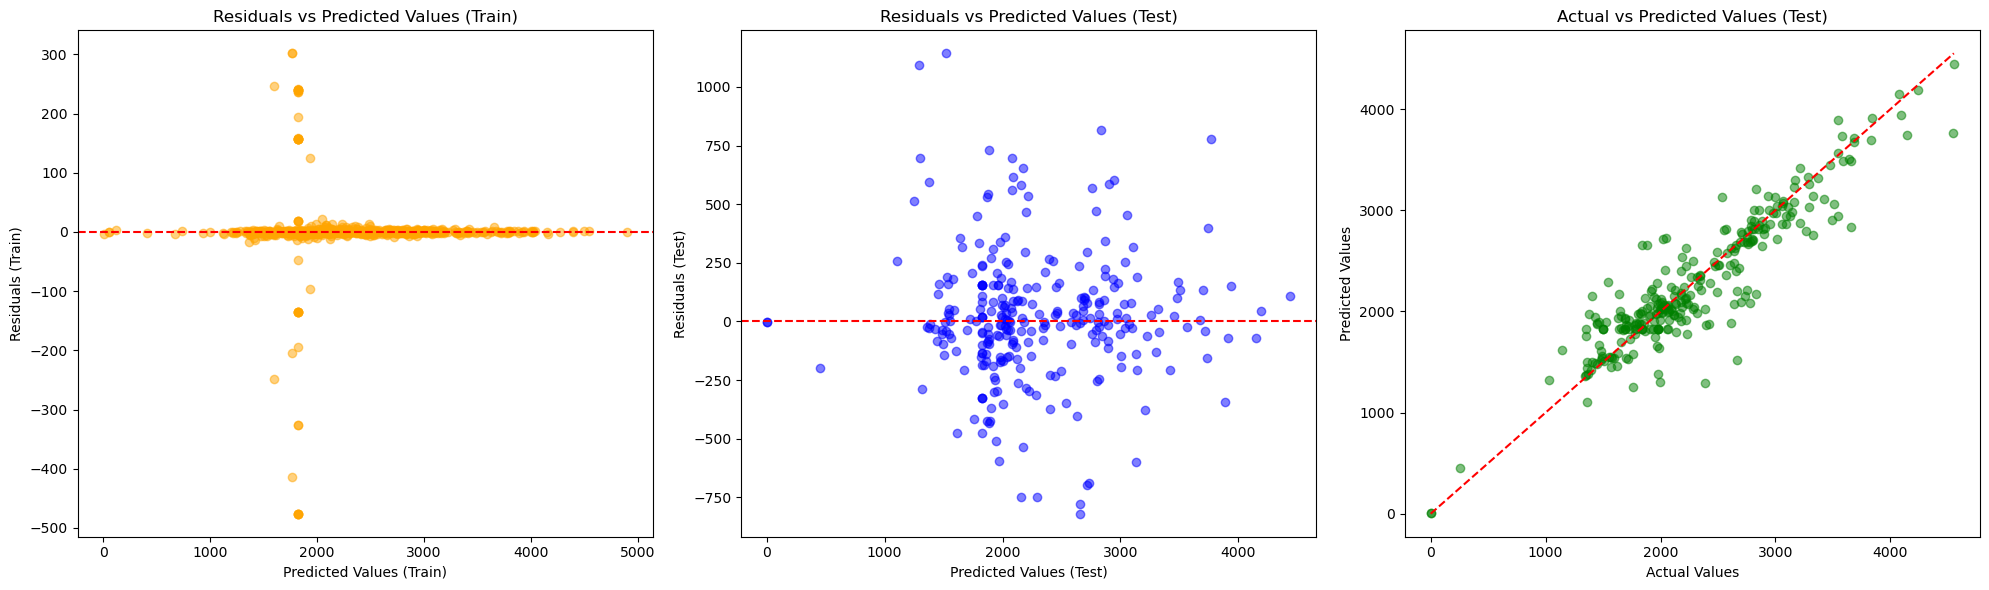

{'Model': 'XGBoost',
 'Training Time (s)': 1.6258699893951416,
 'RMSE Train': 62.9939025203824,
 'RMSE Test': 280.47514863726707,
 'R2 Train': 0.9922460118929545,
 'R2 Test': 0.844267725944519,
 'MAE Train': 14.610948804941716,
 'MAE Test': 192.34991860896983,
 'Mean Residual Train': 0.0033016408052255757,
 'Mean Residual Test': 18.924878113658714,
 'MAPE Train': 11287964651463.898,
 'MAPE Test': 95510081533443.72}

In [386]:
xgb_results = evaluate_model(XGBRegressor(random_state=42), 'XGBoost')
results.append(xgb_results)
xgb_results

## Gradient Boosting

<Figure size 1400x600 with 0 Axes>

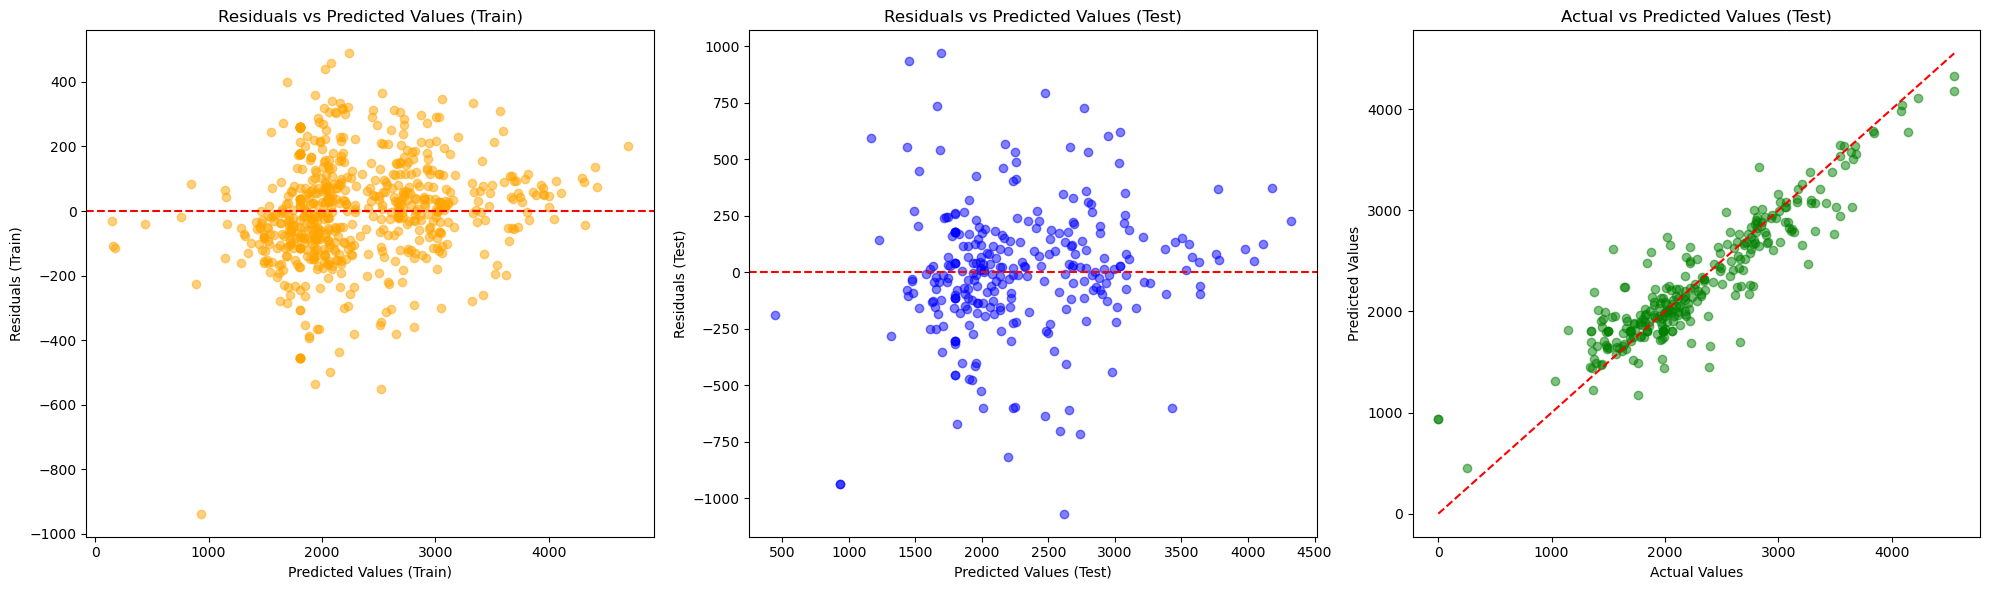

{'Model': 'Gradient Boosting',
 'Training Time (s)': 2.0825395584106445,
 'RMSE Train': 137.61462932574747,
 'RMSE Test': 285.0573288034237,
 'R2 Train': 0.9626359478871813,
 'R2 Test': 0.8391377154708284,
 'MAE Train': 102.5873963398417,
 'MAE Test': 200.37626792390301,
 'Mean Residual Train': -7.336867457224535e-14,
 'Mean Residual Test': 4.231014291293035,
 'MAPE Train': 4151050850143833.5,
 'MAPE Test': 2.993604486072745e+16}

In [387]:
gb_results = evaluate_model(GradientBoostingRegressor(random_state=42), 'Gradient Boosting')
results.append(gb_results)
gb_results

## SVR

<Figure size 1400x600 with 0 Axes>

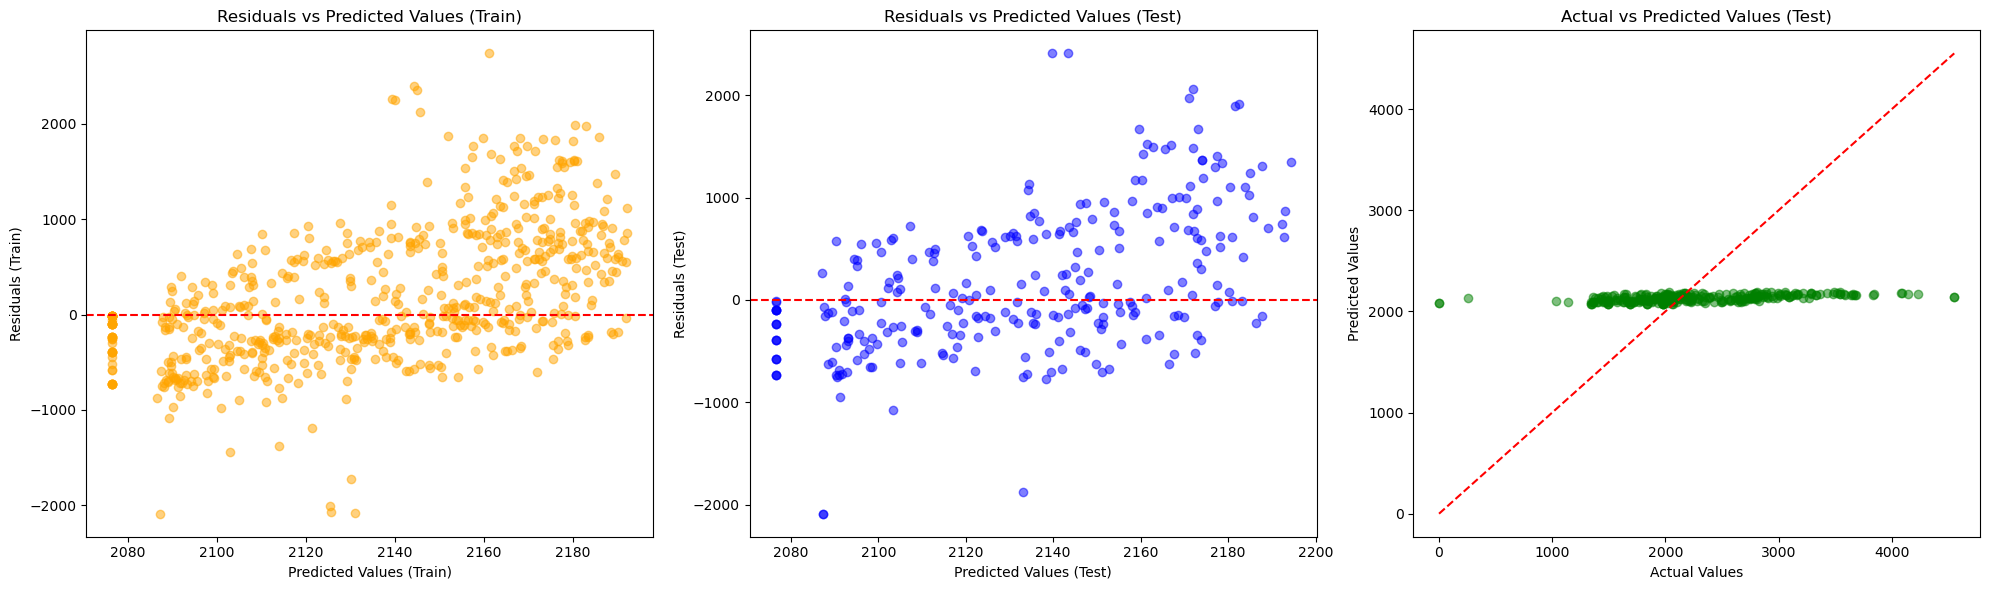

{'Model': 'Support Vector Regressor',
 'Training Time (s)': 0.9222309589385986,
 'RMSE Train': 720.9524316721926,
 'RMSE Test': 712.3537841724138,
 'R2 Train': -0.016884637264912922,
 'R2 Test': -0.0045724907436199835,
 'MAE Train': 547.7633507074446,
 'MAE Test': 540.4321066302219,
 'Mean Residual Train': 173.59908555294376,
 'Mean Residual Test': 164.93709788558337,
 'MAPE Train': 1.4578896152099466e+16,
 'MAPE Test': 6.6668498672830424e+16}

In [388]:
svr_results = evaluate_model(SVR(), 'Support Vector Regressor')
results.append(svr_results)
svr_results

## Bayesian Ridge

<Figure size 1400x600 with 0 Axes>

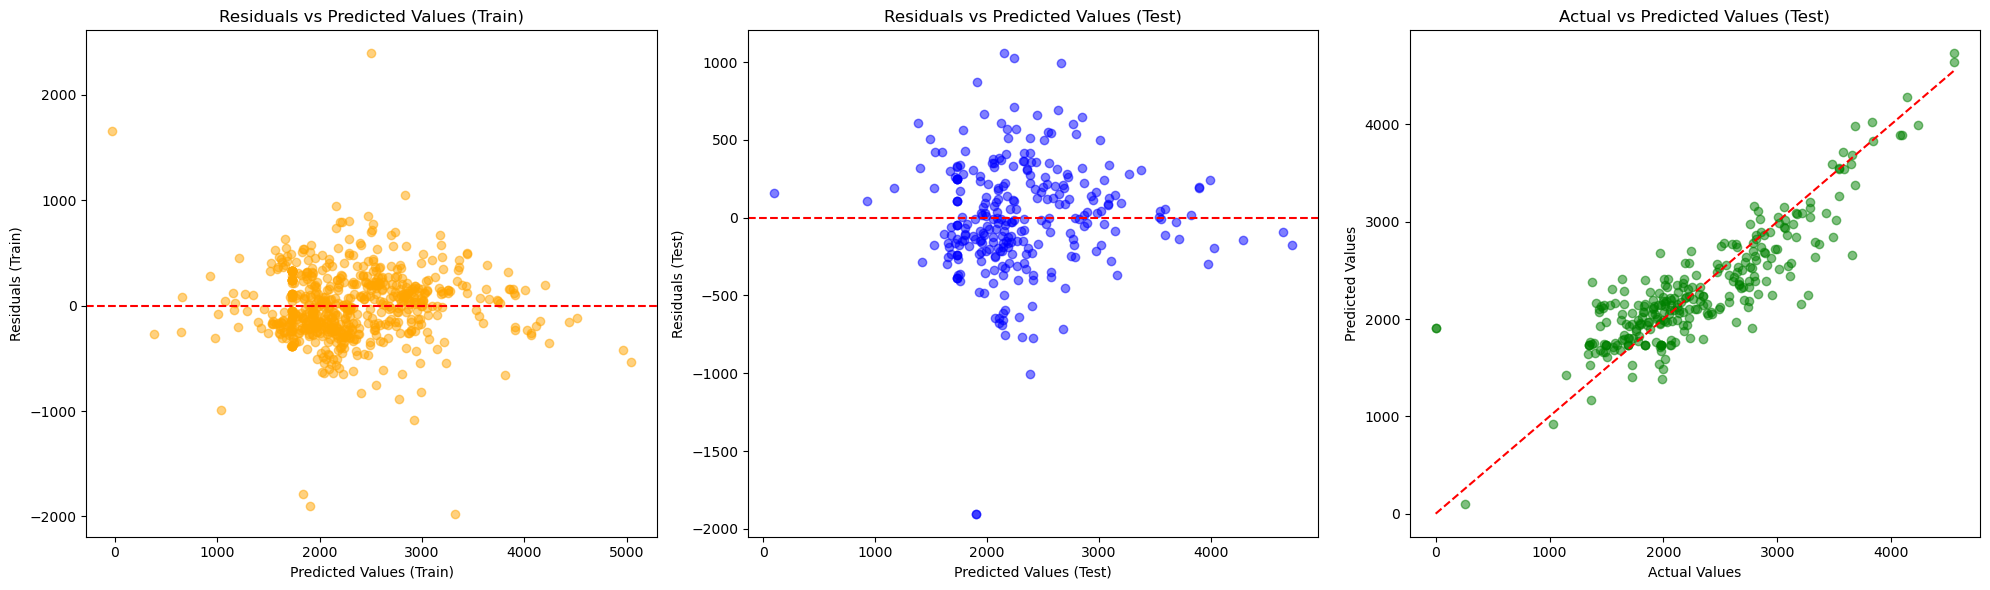

{'Model': 'Bayesian Ridge',
 'Training Time (s)': 0.6936070919036865,
 'RMSE Train': 330.796577492034,
 'RMSE Test': 362.4510017486949,
 'R2 Train': 0.7859671248034821,
 'R2 Test': 0.7399311012735241,
 'MAE Train': 243.73385095559573,
 'MAE Test': 265.90897449830595,
 'Mean Residual Train': 4.163326203321281e-13,
 'Mean Residual Test': -1.3031096962631201,
 'MAPE Train': 1.2687768780376712e+16,
 'MAPE Test': 6.077361047479043e+16}

In [389]:
br_results = evaluate_model(BayesianRidge(), 'Bayesian Ridge')
results.append(br_results)
br_results

## CatBoost

<Figure size 1400x600 with 0 Axes>

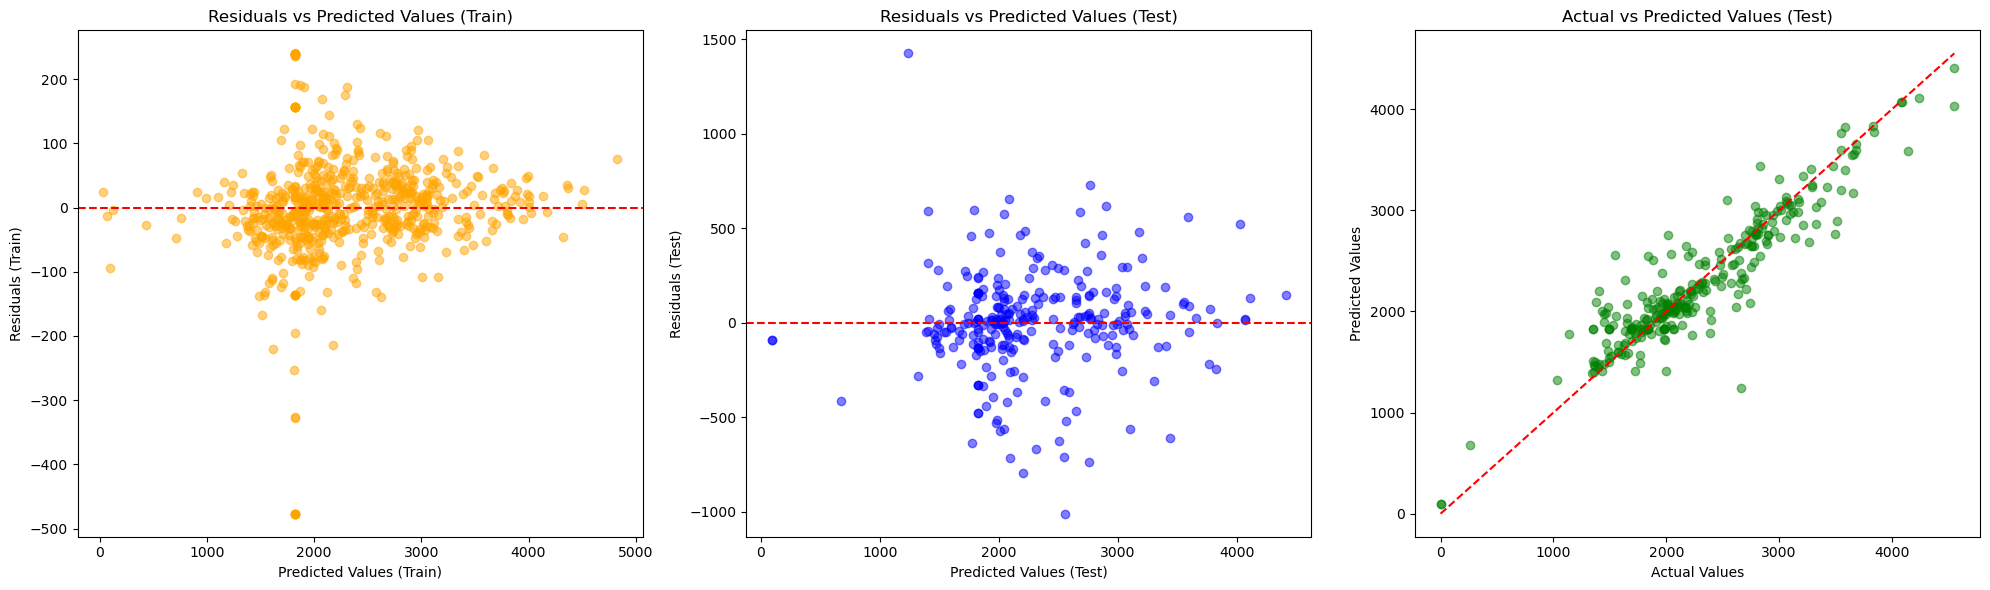

{'Model': 'CatBoost Regressor',
 'Training Time (s)': 12.22512173652649,
 'RMSE Train': 76.61238974529999,
 'RMSE Test': 269.71457707550127,
 'R2 Train': 0.9884803355109665,
 'R2 Test': 0.855988011196397,
 'MAE Train': 44.27422333570758,
 'MAE Test': 181.90262814686417,
 'Mean Residual Train': -0.04463457739553484,
 'Mean Residual Test': 0.16407086543150248,
 'MAPE Train': 608105856577493.9,
 'MAPE Test': 3007719754422664.0}

In [390]:
cb_results = evaluate_model(CatBoostRegressor(random_state=42, silent=True), 'CatBoost Regressor')
results.append(cb_results)
cb_results

## LightGBM

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2317
[LightGBM] [Info] Number of data points in the train set: 438, number of used features: 21
[LightGBM] [Info] Start training from score 2331.639269
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

<Figure size 1400x600 with 0 Axes>

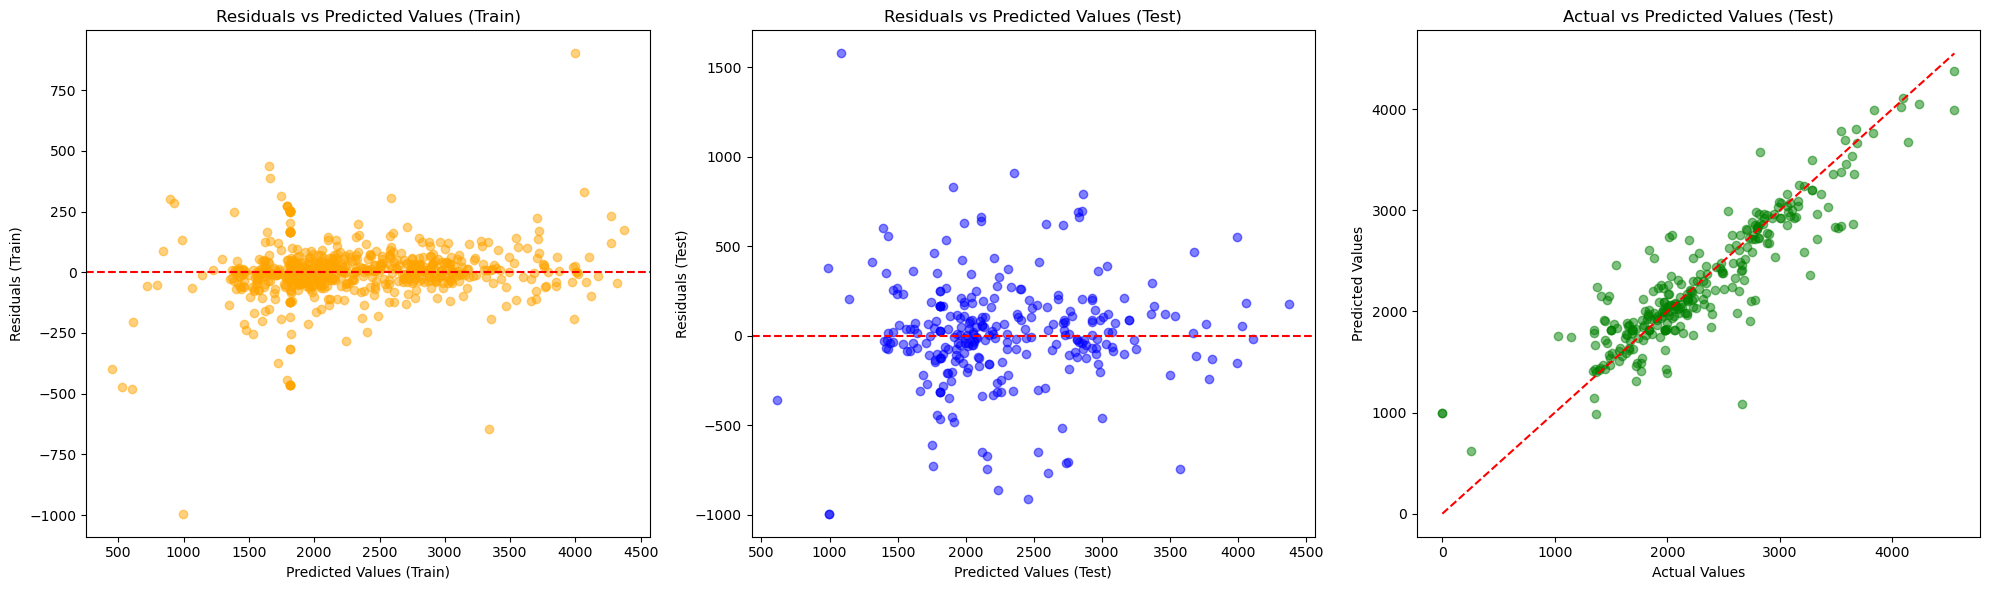

{'Model': 'LightGBM Regressor',
 'Training Time (s)': 1.3152515888214111,
 'RMSE Train': 125.88763814419436,
 'RMSE Test': 306.47399902786117,
 'R2 Train': 0.9690070319432448,
 'R2 Test': 0.8140581787763876,
 'MAE Train': 76.54689224951132,
 'MAE Test': 206.73552663262652,
 'Mean Residual Train': -4.728242571630814e-08,
 'Mean Residual Test': 11.767348494262352,
 'MAPE Train': 7153350471309995.0,
 'MAPE Test': 3.1762820385039104e+16}

In [391]:
lgbm_results = evaluate_model(LGBMRegressor(random_state=42), 'LightGBM Regressor')
results.append(lgbm_results)
lgbm_results

## ExtraTrees

<Figure size 1400x600 with 0 Axes>

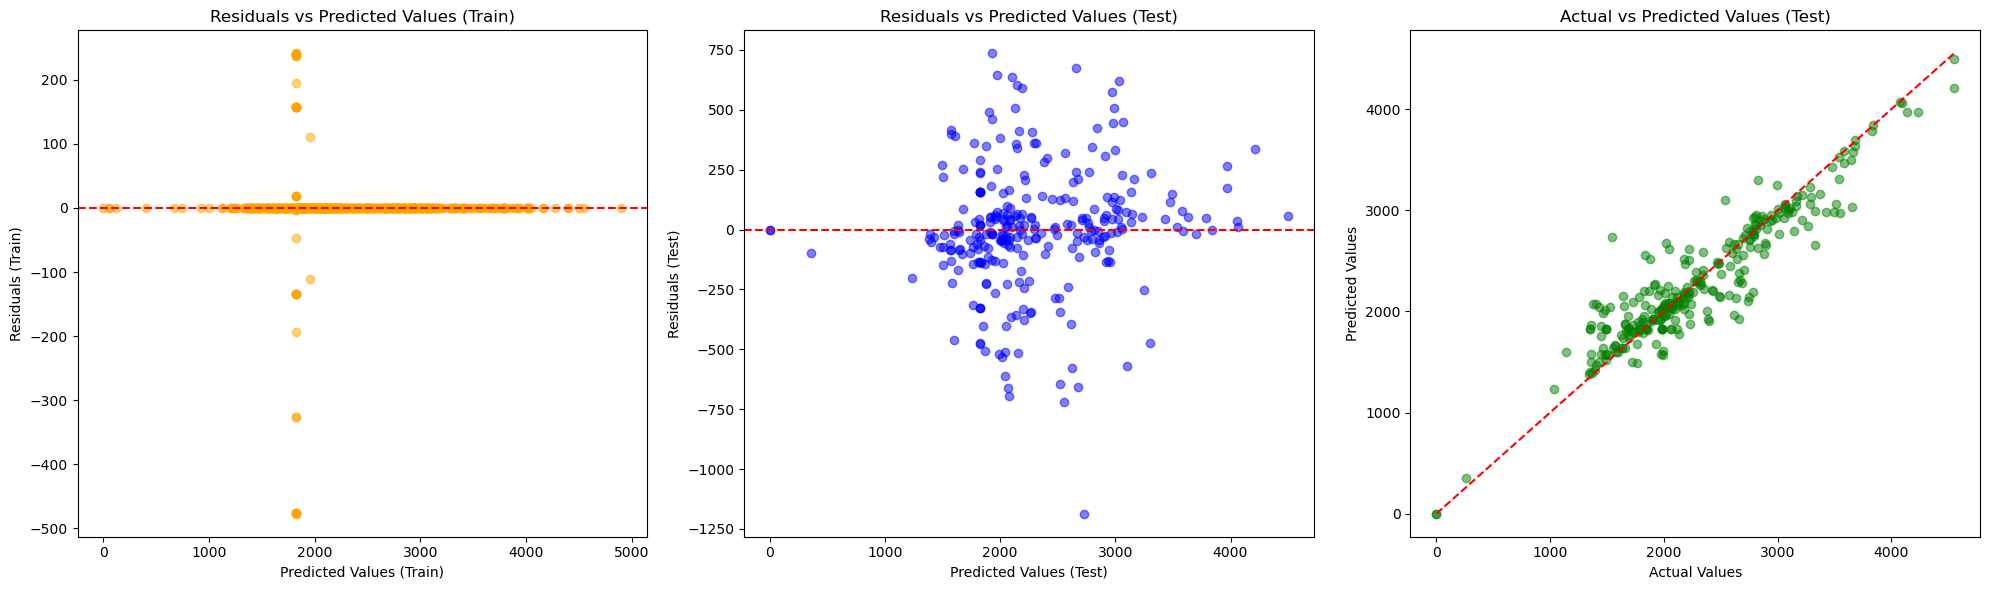

{'Model': 'Extra Trees Regressor',
 'Training Time (s)': 2.2776012420654297,
 'RMSE Train': 62.75153327964148,
 'RMSE Test': 258.45233032515586,
 'R2 Train': 0.9923046372362894,
 'R2 Test': 0.8677636922681069,
 'MAE Train': 13.566958295819875,
 'MAE Test': 176.76846969959058,
 'Mean Residual Train': -1.5227460760277336e-14,
 'Mean Residual Test': 1.3514801360779376,
 'MAPE Train': 0.008080547056358724,
 'MAPE Test': 0.08633650698602513}

In [392]:
et_results = evaluate_model(ExtraTreesRegressor(random_state=42), 'Extra Trees Regressor')
results.append(et_results)
et_results

## Hasil

In [393]:
results_df = pd.DataFrame(results)

results_df['RMSE Difference'] = results_df['RMSE Test'] - results_df['RMSE Train']
results_df['R2 Difference'] = results_df['R2 Test'] - results_df['R2 Train']
results_df['MAE Difference'] = results_df['MAE Test'] - results_df['MAE Train']
results_df['MAPE Difference'] = results_df['MAPE Test'] - results_df['MAPE Train']

# Menentukan urutan kolom yang diinginkan
columns_order = [
    'Model', 'Training Time (s)', 
    'RMSE Train', 'RMSE Test', 'RMSE Difference',
    'R2 Train', 'R2 Test', 'R2 Difference',
    'MAE Train', 'MAE Test', 'MAE Difference',
    'Mean Residual Train', 'Mean Residual Test',
    'MAPE Train', 'MAPE Test', 'MAPE Difference'
]

# Mengatur urutan kolom dan mengurutkan hasil berdasarkan beberapa metrik
results_df = results_df[columns_order].sort_values(
    by=['RMSE Test', 'RMSE Train', 'RMSE Difference'],
    ascending=[True, True, True]
)

pd.options.display.float_format = '{:.4f}'.format
# Tampilkan DataFrame hasil
results_df

Model  Training Time (s)  RMSE Train  RMSE Test  \
12     Extra Trees Regressor             2.2776     62.7515   258.4523   
10        CatBoost Regressor            12.2251     76.6124   269.7146   
6                    XGBoost             1.6259     62.9939   280.4751   
0              Random Forest             3.7308    122.0076   283.5960   
7          Gradient Boosting             2.0825    137.6146   285.0573   
11        LightGBM Regressor             1.3153    125.8876   306.4740   
5              Decision Tree             0.7088     62.7515   355.2174   
1          Linear Regression             0.6942    326.1670   358.0001   
3                      Lasso             0.7507    331.5738   362.0920   
9             Bayesian Ridge             0.6936    330.7966   362.4510   
2                      Ridge             0.6992    331.2295   362.5299   
4                Elastic Net             0.6772    441.7870   469.1041   
8   Support Vector Regressor             0.9222    720.9524   712.3538   

    RMSE Difference  R2 Train  R2 Test  R2 Difference  MAE Train  MAE Test  \
12         195.7008    0.9923   0.8678        -0.1245    13.5670  176.7685   
10         193.1022    0.9885   0.8560        -0.1325    44.2742  181.9026   
6          217.4812    0.9922   0.8443        -0.1480    14.6109  192.3499   
0          161.5885    0.9708   0.8408        -0.1301    80.4056  194.6590   
7          147.4427    0.9626   0.8391        -0.1235   102.5874  200.3763   
11         180.5864    0.9690   0.8141        -0.1549    76.5469  206.7355   
5          292.4659    0.9923   0.7502        -0.2421    13.5670  230.7993   
1           31.8330    0.7920   0.7463        -0.0457   242.6686  264.5890   
3           30.5182    0.7850   0.7404        -0.0445   244.4303  265.1245   
9           31.6544    0.7860   0.7399        -0.0460   243.7339  265.9090   
2           31.3004    0.7854   0.7398        -0.0456   243.9937  265.9356   
4           27.3171    0.6173   0.5644        -0.0529   357.1648  381.7739   
8           -8.5986   -0.0169  -0.0046         0.0123   547.7634  540.4321   

    MAE Difference  Mean Residual Train  Mean Residual Test  \
12        163.2015              -0.0000              1.3515   
10        137.6284              -0.0446              0.1641   
6         177.7390               0.0033             18.9249   
0         114.2534              -3.6966              3.1403   
7          97.7889              -0.0000              4.2310   
11        130.1886              -0.0000             11.7673   
5         217.2324               0.0000             18.9352   
1          21.9204               0.0000             -1.8548   
3          20.6942               0.0000             -0.3587   
9          22.1751               0.0000             -1.3031   
2          21.9419               0.0000             -1.2706   
4          24.6091               0.0000             20.7478   
8          -7.3312             173.5991            164.9371   

               MAPE Train              MAPE Test        MAPE Difference  
12                 0.0081                 0.0863                 0.0783  
10   608105856577493.8750  3007719754422664.0000  2399613897845170.0000  
6     11287964651463.8984    95510081533443.7188    84222116881979.8125  
0   4171653249832884.5000 22504902563467928.0000 18333249313635044.0000  
7   4151050850143833.5000 29936044860727448.0000 25784994010583616.0000  
11  7153350471309995.0000 31762820385039104.0000 24609469913729108.0000  
5                  0.0081                 0.1086                 0.1005  
1  11461632519938336.0000 55832558702517024.0000 44370926182578688.0000  
3  12842302027583322.0000 62630956485046472.0000 49788654457463152.0000  
9  12687768780376712.0000 60773610474790432.0000 48085841694413720.0000  
2  12809362821878022.0000 61008488665991472.0000 48199125844113448.0000  
4  13655641533571536.0000 64086753748926248.0000 50431112215354712.0000  
8  14578896152099466.0000 66668498672830424.0000

In [394]:
# results_df = pd.DataFrame(results)

# # Sesuaikan nama kolom dengan hasil dari evaluate_model
# results_df['RMSE Difference'] = results_df['Test RMSE'] - results_df['Train RMSE']
# results_df['R2 Difference'] = results_df['Test R2'] - results_df['Train R2']
# results_df['MAE Difference'] = results_df['Test MAE'] - results_df['Train MAE']
# results_df['MAPE Difference'] = results_df['Test MAPE'] - results_df['Train MAPE']

# columns_order = ['Model', 'Training Time (s)', 
#                  'Train RMSE', 'Test RMSE', 'RMSE Difference',
#                  'Train R2', 'Test R2', 'R2 Difference',
#                  'Train MAE', 'Test MAE', 'MAE Difference', 
#                  'Residual Mean Train', 'Residual Mean Test',
#                  'Train MAPE', 'Test MAPE', 'MAPE Difference']

# results_df = results_df[columns_order].sort_values(by=['Test RMSE', 'Train RMSE', 'RMSE Difference'], ascending=[True, True, True])

# results_df

# Model: Tuning

In [395]:
from sklearn.model_selection import GridSearchCV

In [396]:
results = []

## Linear Regression (no tuning needed)

<Figure size 1400x600 with 0 Axes>

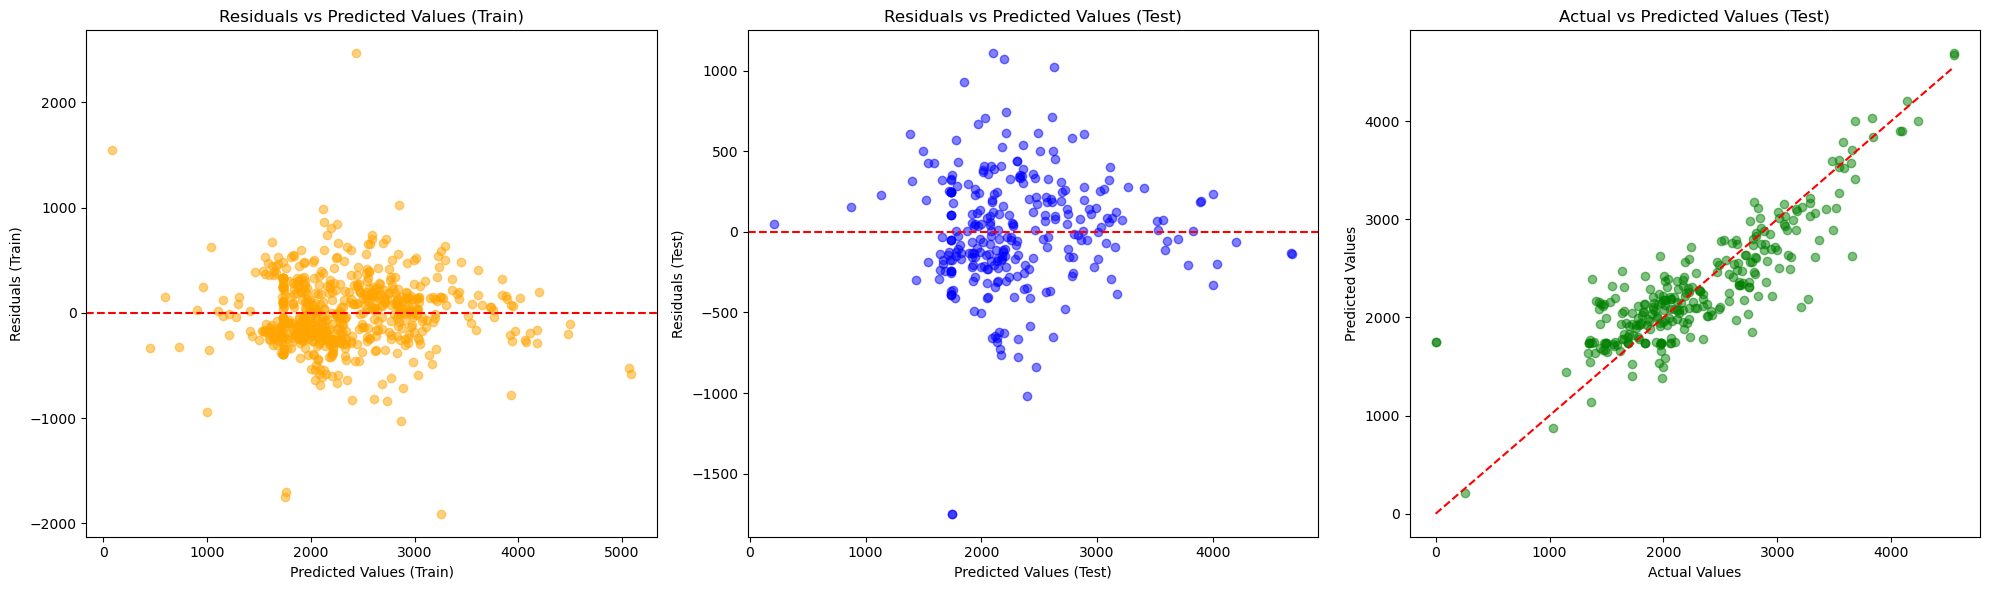

In [397]:
results.append(evaluate_model(LinearRegression(), 'Linear Regression'))

## Ridge

c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was re

<Figure size 1400x600 with 0 Axes>

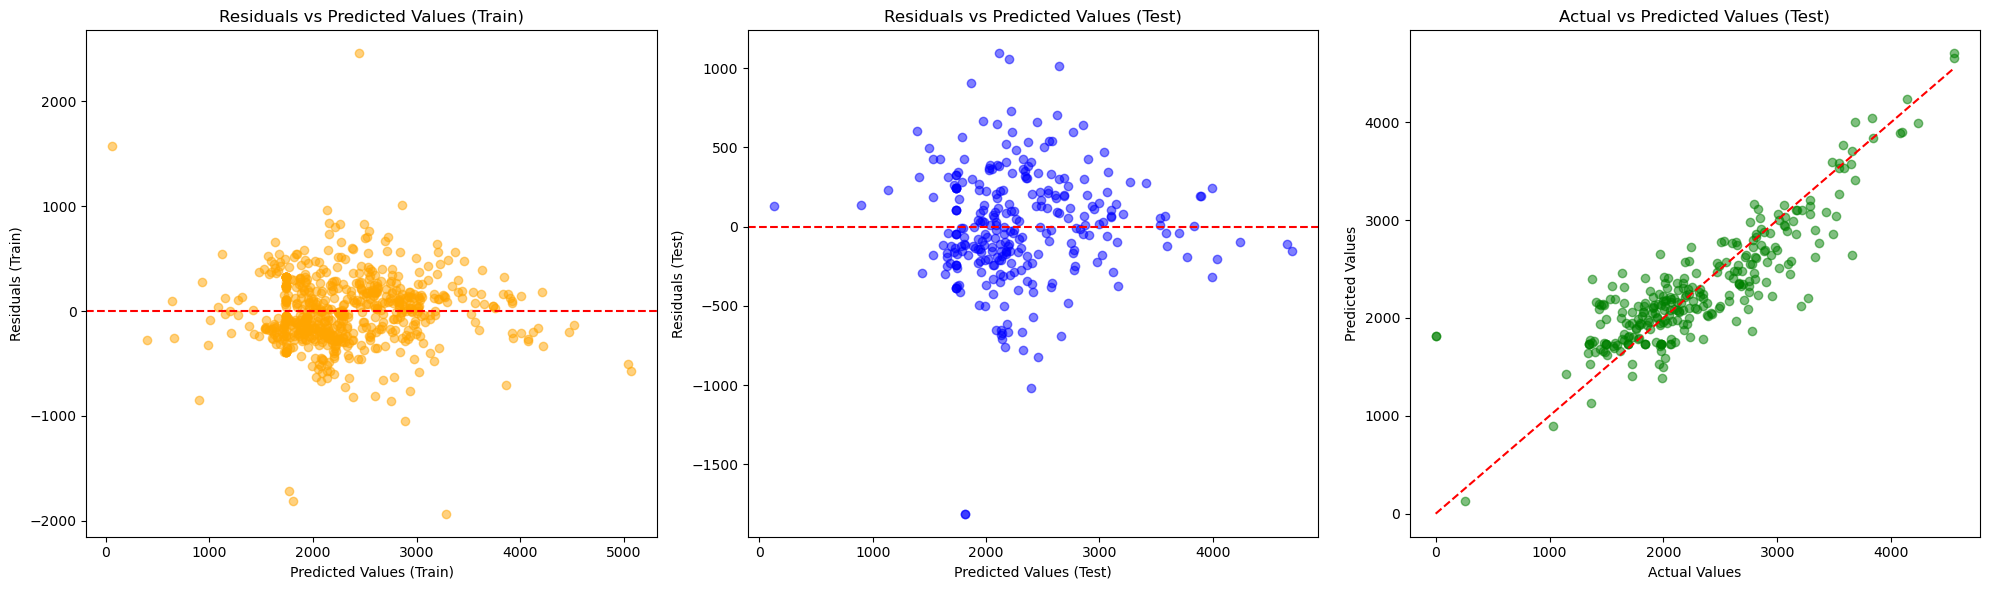

In [398]:
ridge_params = {
    'alpha': [0.1, 1.0, 10.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga'] 
}
ridge_model = GridSearchCV(Ridge(), ridge_params, scoring='neg_mean_absolute_error', cv=3)
ridge_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(ridge_model.best_estimator_, 'Ridge'))

## Lasso

c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.559e+06, tolerance: 2.357e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.455e+06, tolerance: 2.154e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.733e+07, tolerance: 

<Figure size 1400x600 with 0 Axes>

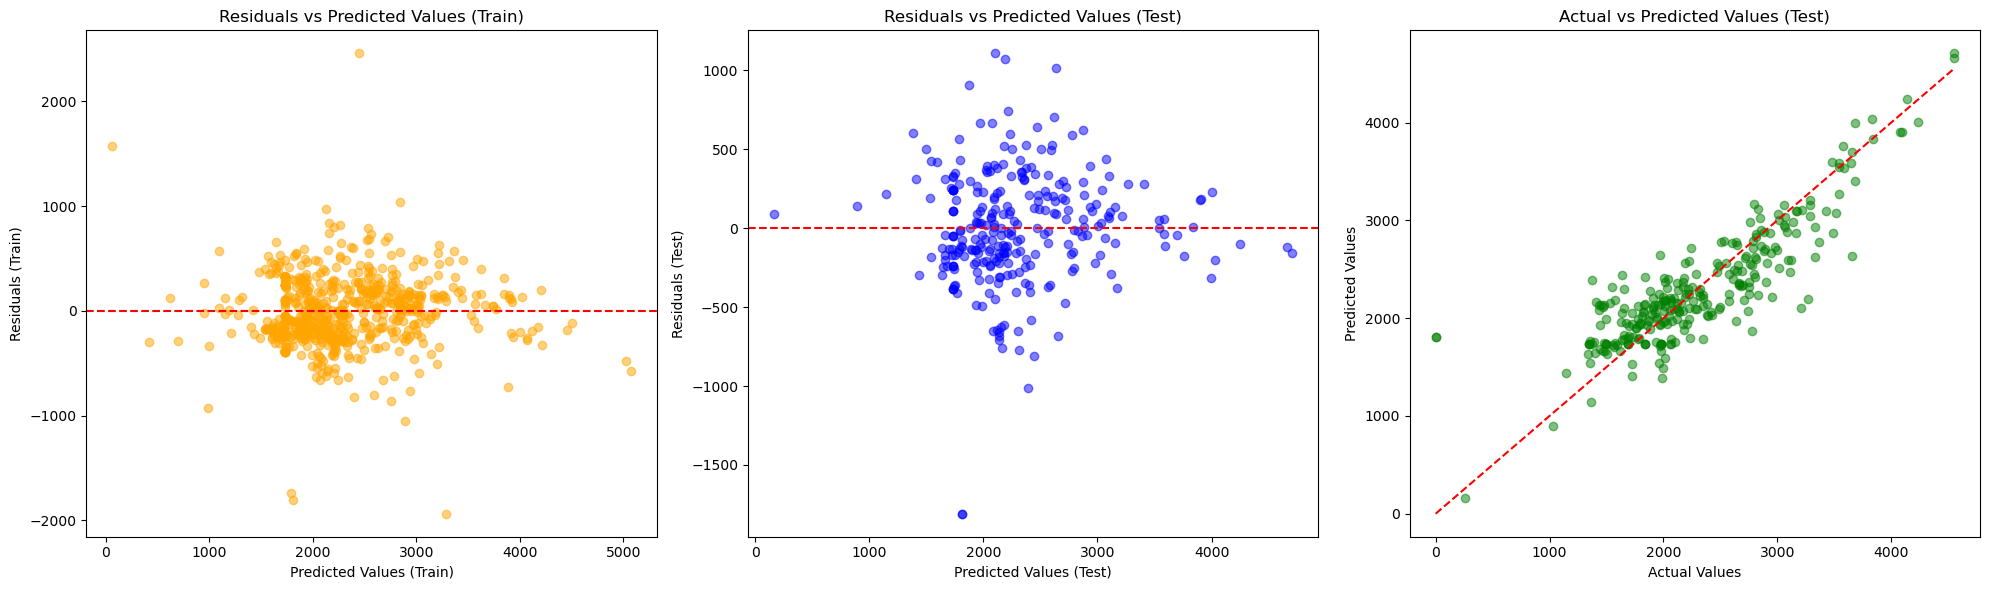

In [399]:
# Lasso dengan tuning
lasso_params = {
    'alpha': [0.1, 1.0, 10.0, None],  
    'fit_intercept': [True, False],   
    'max_iter': [1000, 5000]          
}
lasso_model = GridSearchCV(Lasso(), lasso_params, scoring='neg_mean_absolute_error', cv=3)
lasso_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(lasso_model.best_estimator_, 'Lasso'))


## ElasticNet

c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.306e+04, tolerance: 2.357e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.911e+05, tolerance: 2.510e+05
  model = cd_fast.enet_coordinate_descent(
c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
72 fits failed out of a total of 288.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting 

<Figure size 1400x600 with 0 Axes>

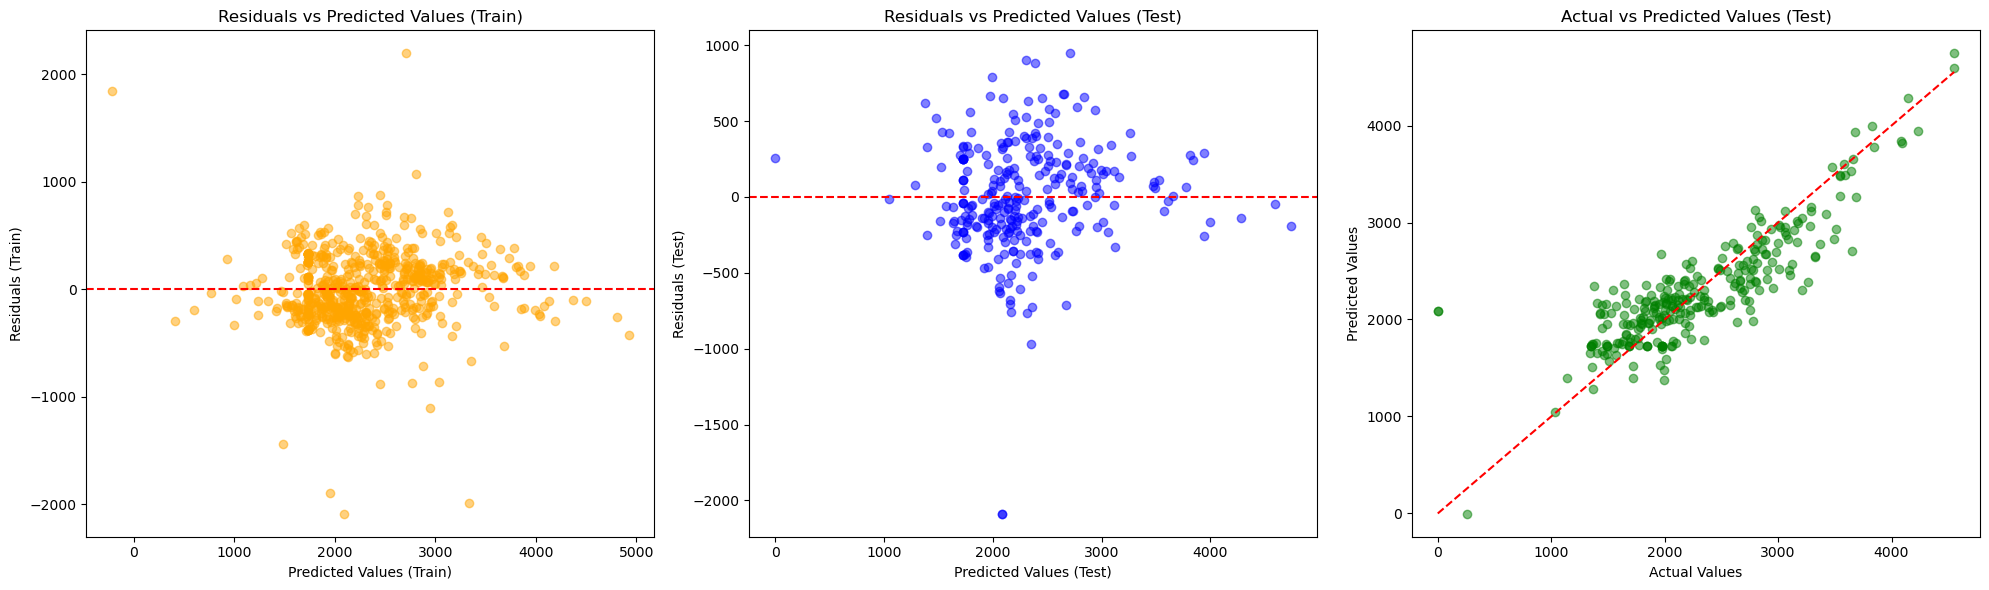

In [400]:
elastic_params = {
    'alpha': [0.1, 1.0, 10.0, None],
    'l1_ratio': [0.1, 0.5, 0.9],
    'fit_intercept': [True, False],
    'max_iter': [1000, 5000],
    'tol': [1e-4, 1e-3]
}
elastic_model = GridSearchCV(ElasticNet(), elastic_params, scoring='neg_mean_absolute_error', cv=3)
elastic_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(elastic_model.best_estimator_, 'Elastic Net'))

## Decision Tree

c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
108 fits failed out of a total of 324.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
108 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Asty\anaconda3\Lib\site-packages\sk

<Figure size 1400x600 with 0 Axes>

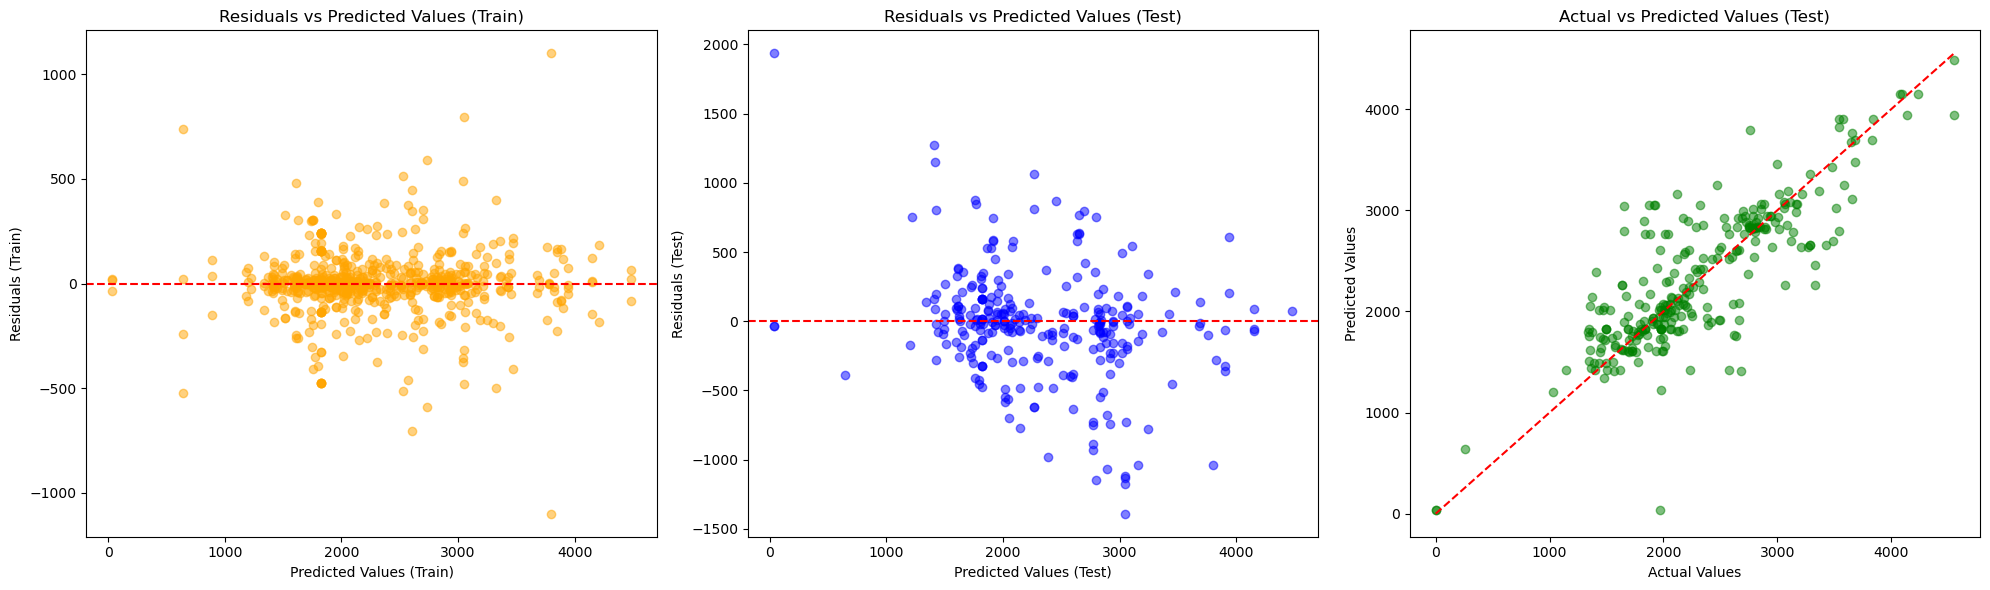

In [401]:
# Decision Tree dengan tuning
dt_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
dt_model = GridSearchCV(DecisionTreeRegressor(), dt_params, scoring='neg_mean_absolute_error', cv=3)
dt_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(dt_model.best_estimator_, 'Decision Tree'))

## XGBoost

<Figure size 1400x600 with 0 Axes>

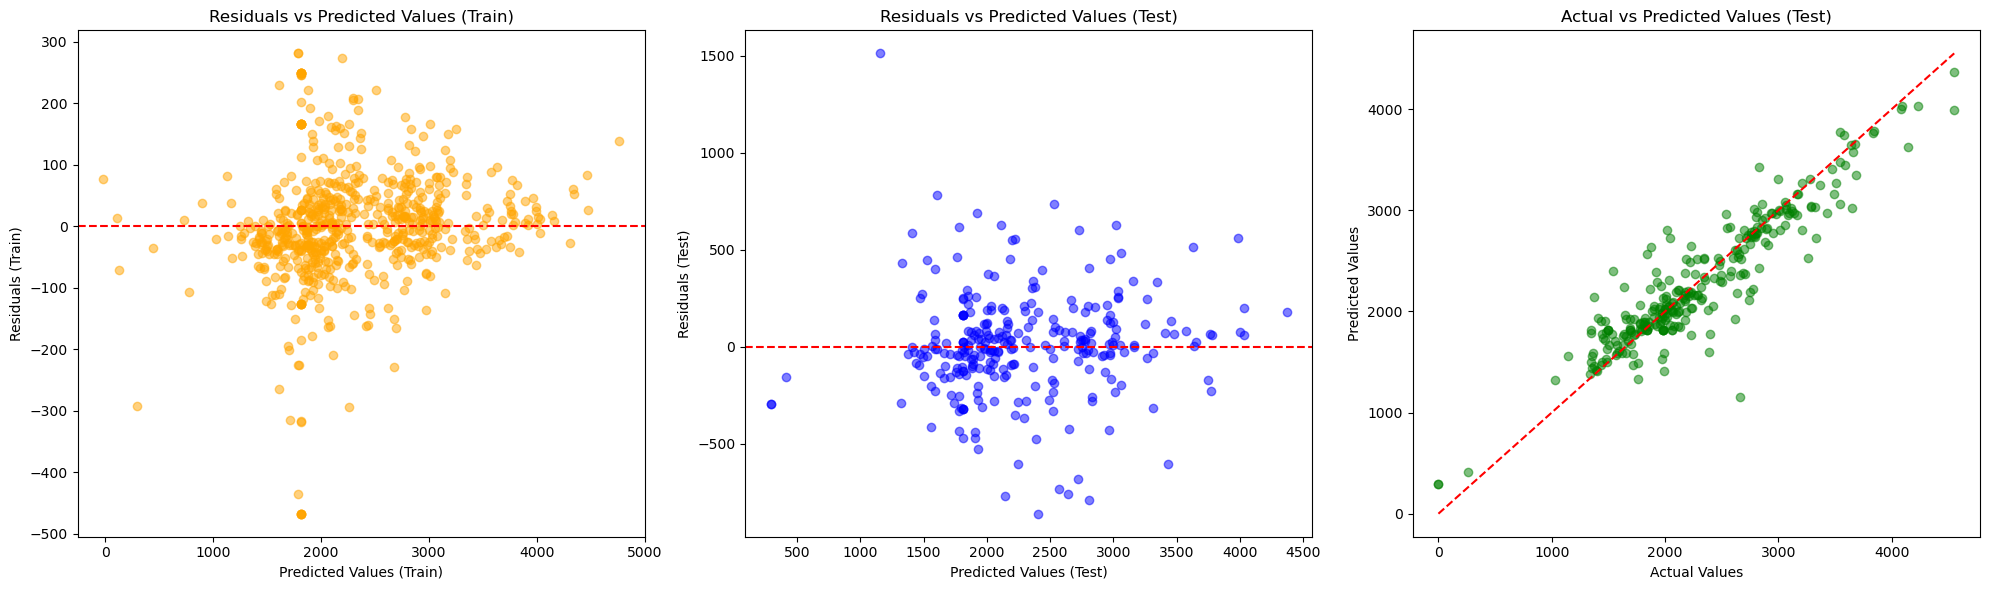

In [402]:
xgb_params = {
    'n_estimators': [50, 100],        
    'max_depth': [3, 5],               
    'learning_rate': [0.01, 0.1, 0.2], 
    'subsample': [0.8, 1.0]            # Proporsi data yang digunakan untuk setiap pohon
}
xgb_model = GridSearchCV(XGBRegressor(), xgb_params, scoring='neg_mean_absolute_error', cv=3)
xgb_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(xgb_model.best_estimator_, 'XGBoost'))


## Gradient Boosting

<Figure size 1400x600 with 0 Axes>

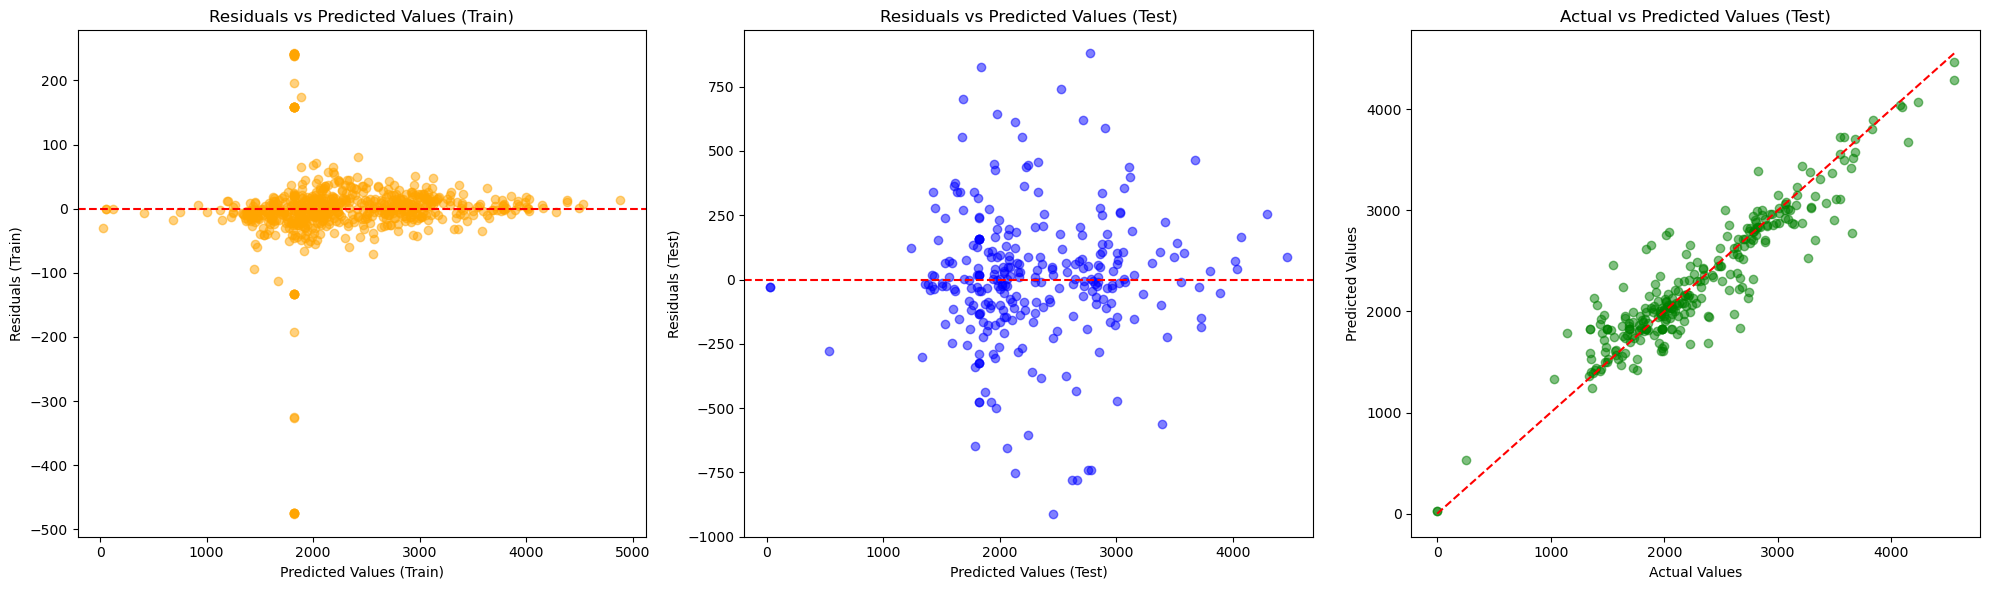

In [403]:
gb_params = {
    'n_estimators': [100, 200], 
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
gb_model = GridSearchCV(GradientBoostingRegressor(), gb_params, scoring='neg_mean_absolute_error', cv=3)
gb_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(gb_model.best_estimator_, 'Gradient Boosting'))

## SVR

<Figure size 1400x600 with 0 Axes>

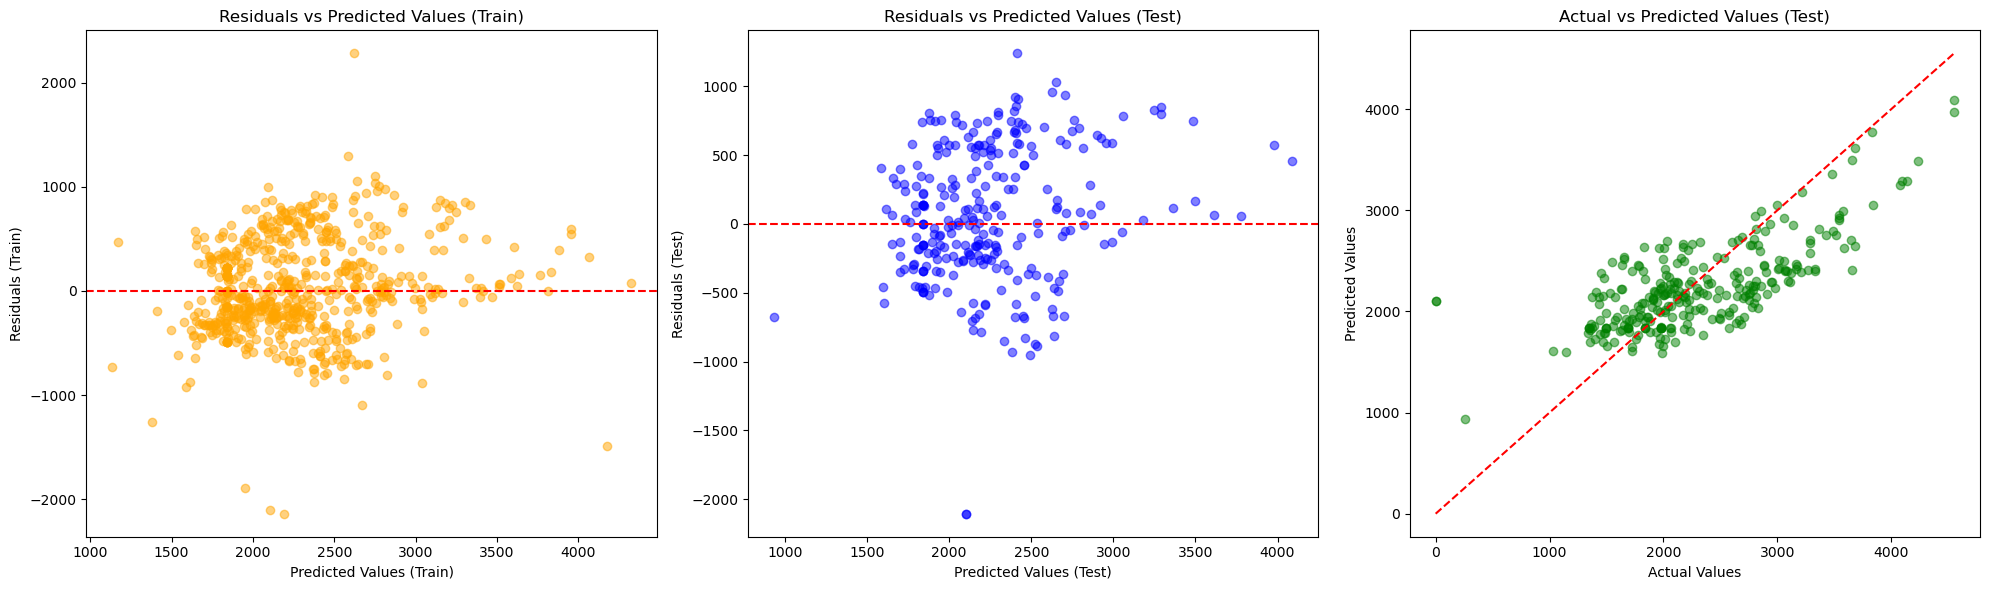

In [404]:
# SVR dengan tuning
svr_params = {
    'C': [0.1, 1.0],                    # Regularization parameter
    'epsilon': [0.1, 0.2],              # Margin of tolerance
    'kernel': ['linear', 'rbf','poly','sigmoid']
}
svr_model = GridSearchCV(SVR(), svr_params, scoring='neg_mean_absolute_error', cv=3)
svr_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(svr_model.best_estimator_, 'SVR'))

## Bayesian Ridge

<Figure size 1400x600 with 0 Axes>

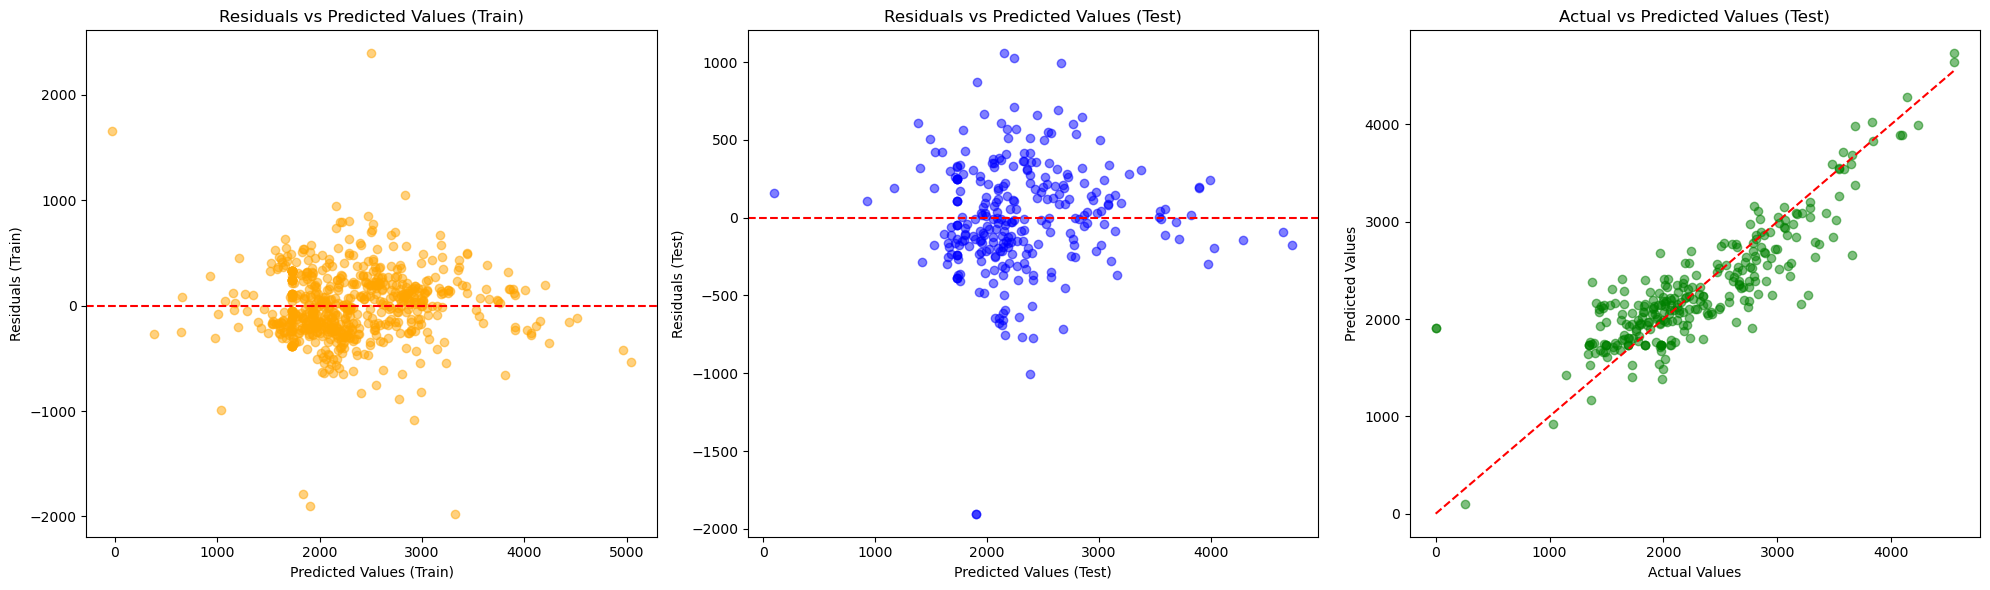

In [405]:
# Bayesian Ridge tanpa tuning
results.append(evaluate_model(BayesianRidge(), 'Bayesian Ridge'))

## CatBoost

<Figure size 1400x600 with 0 Axes>

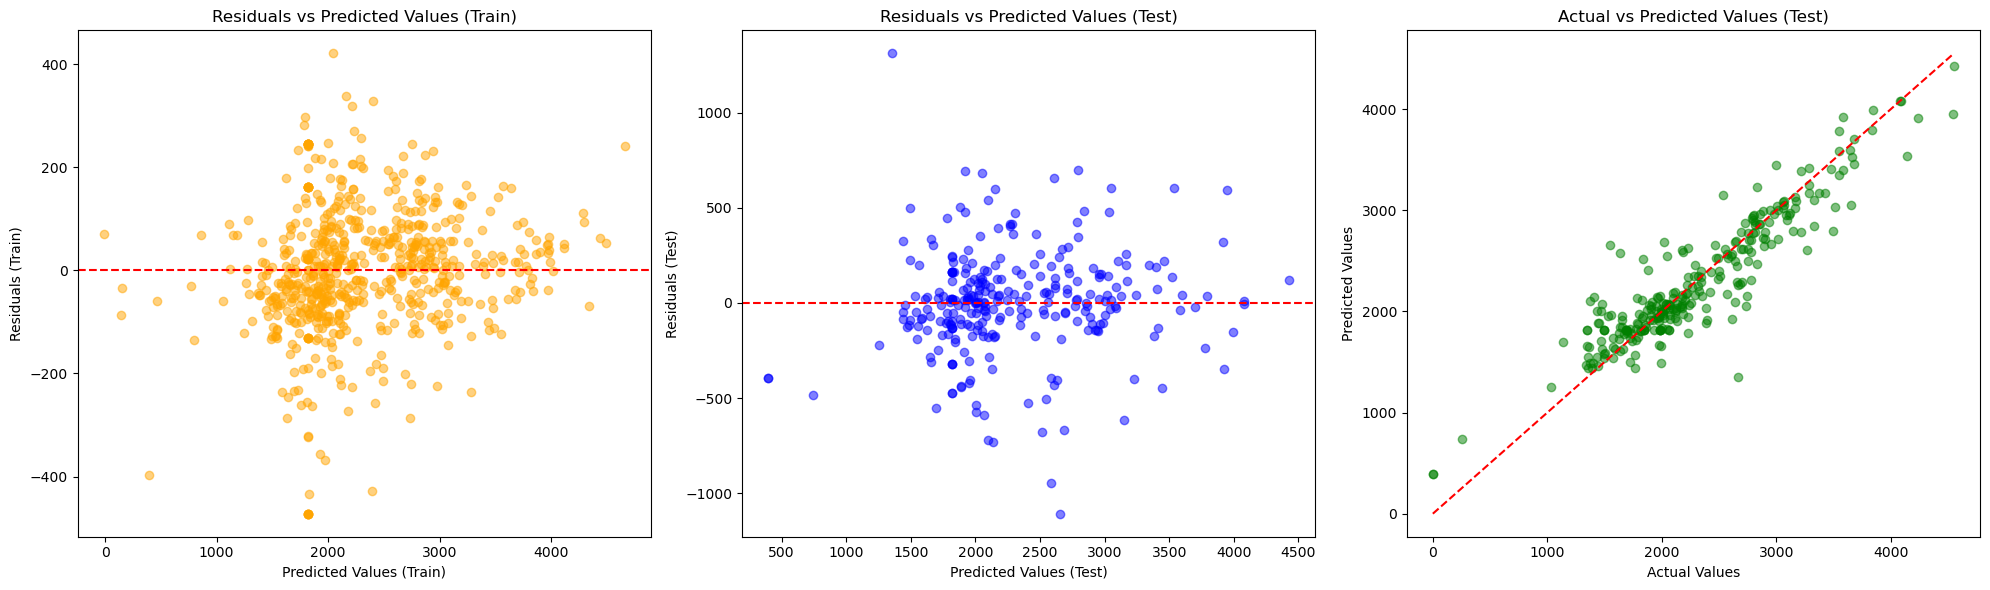

In [406]:
cat_params = {
    'depth': [None, 6, 8], 
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.1],
    'l2_leaf_reg': [3, 5] 
}
cat_model = GridSearchCV(CatBoostRegressor(silent=True), cat_params, scoring='neg_mean_absolute_error', cv=3)
cat_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(cat_model.best_estimator_, 'CatBoost'))

## LightGBM

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2290
[LightGBM] [Info] Number of data points in the train set: 438, number of used features: 21
[LightGBM] [Info] Start training from score 2278.732877
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

<Figure size 1400x600 with 0 Axes>

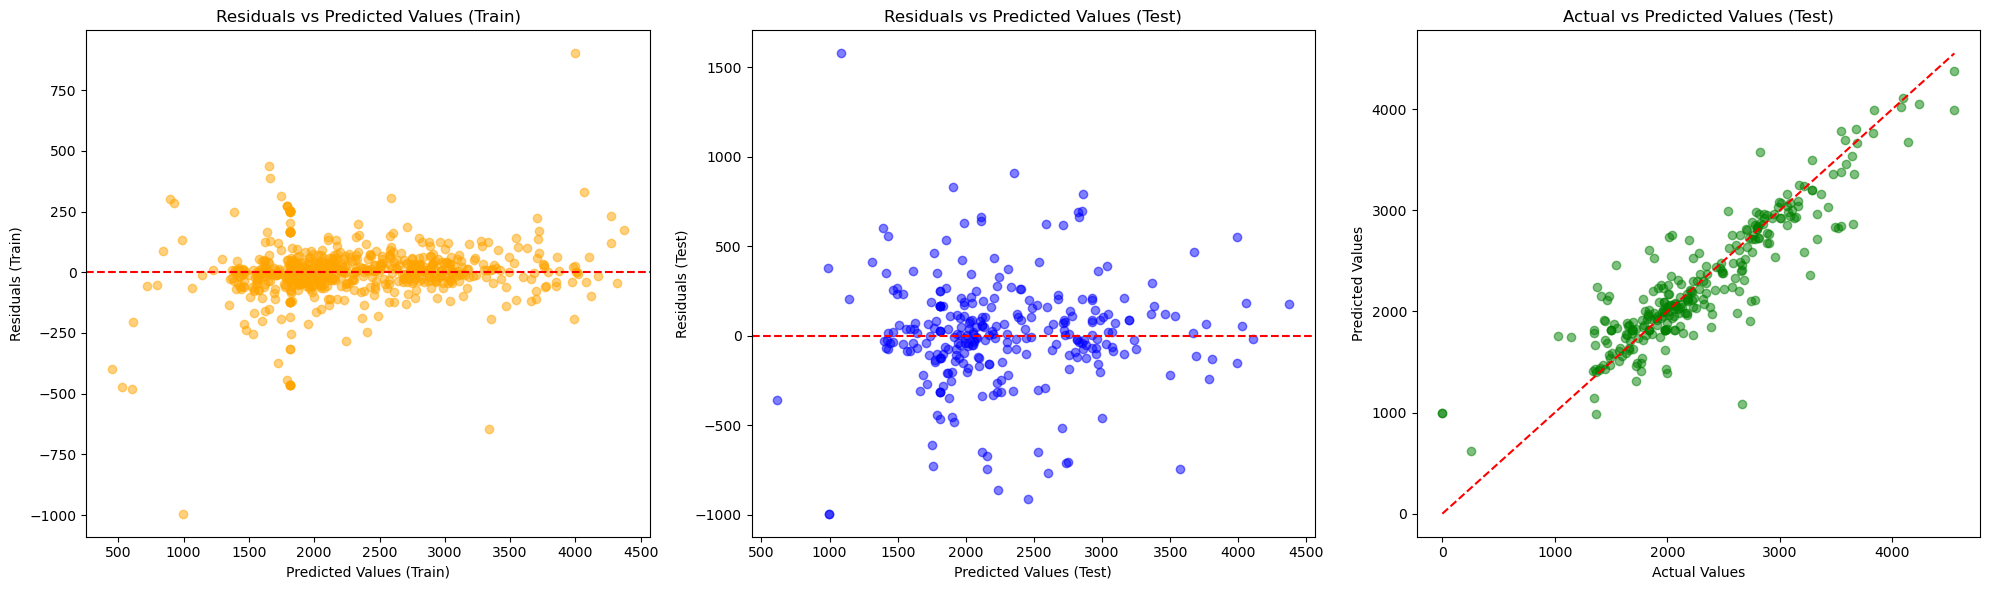

In [407]:
lgb_params = {
    'num_leaves': [31, 61],            
    'learning_rate': [0.1, 0.2],       
    'max_depth': [None, 5, 10]         
}

lgb_model = GridSearchCV(LGBMRegressor(), lgb_params, scoring='neg_mean_absolute_error', cv=3)
lgb_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(lgb_model.best_estimator_, 'LightGBM'))


## Extra Trees

c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Asty\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Asty\anaconda3\Lib\site-packages\sklea

<Figure size 1400x600 with 0 Axes>

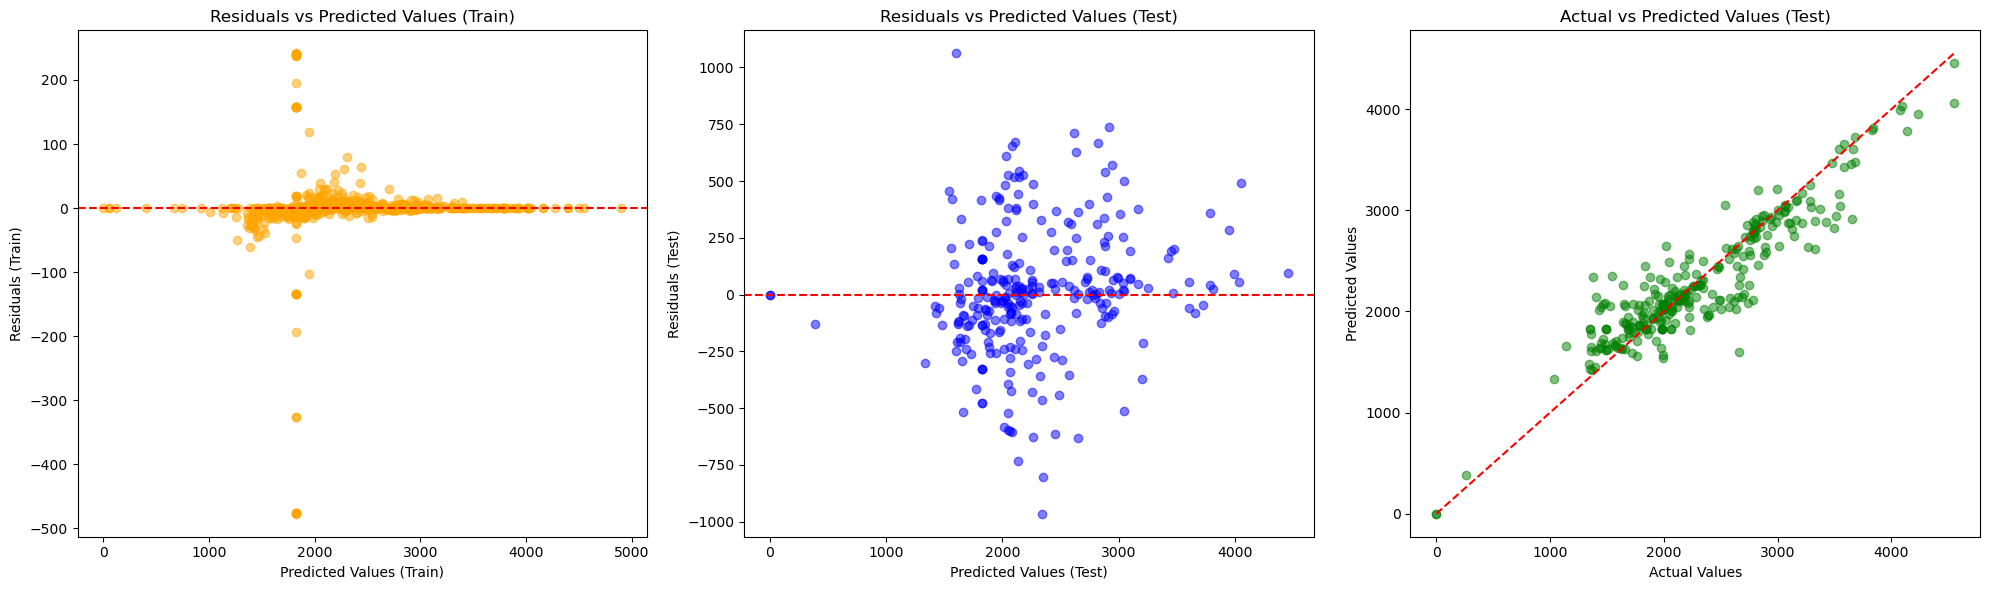

In [408]:
et_params = {
    'n_estimators': [50, 100], 
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20]
}
et_model = GridSearchCV(ExtraTreesRegressor(), et_params, scoring='neg_mean_absolute_error', cv=3)
et_model.fit(X_train, y_train)  # Fit model
results.append(evaluate_model(et_model.best_estimator_, 'Extra Trees'))

## Hasil

In [409]:
results_df = pd.DataFrame(results)

results_df['RMSE Difference'] = results_df['RMSE Test'] - results_df['RMSE Train']
results_df['R2 Difference'] = results_df['R2 Test'] - results_df['R2 Train']
results_df['MAE Difference'] = results_df['MAE Test'] - results_df['MAE Train']
results_df['MAPE Difference'] = results_df['MAPE Test'] - results_df['MAPE Train']

results_df = results_df[columns_order].sort_values(by=['RMSE Test','RMSE Train','RMSE Difference'],ascending=[True,True,True])

results_df

Model  Training Time (s)  RMSE Train  RMSE Test  \
6   Gradient Boosting             4.7990     63.6929   259.9902   
5             XGBoost             1.3587     81.0407   272.0926   
9            CatBoost             2.8918    110.7945   277.7891   
11        Extra Trees             1.9218     62.8901   282.2217   
10           LightGBM             1.1018    125.8876   306.4740   
0   Linear Regression             0.6870    326.1670   358.0001   
2               Lasso             0.6601    328.3147   360.0096   
1               Ridge             1.1536    328.7070   362.0829   
8      Bayesian Ridge             0.6835    330.7966   362.4510   
3         Elastic Net             0.7382    338.3519   366.6930   
4       Decision Tree             0.6807    157.7111   410.7373   
7                 SVR             0.7482    485.4791   495.7896   

    RMSE Difference  R2 Train  R2 Test  R2 Difference  MAE Train  MAE Test  \
6          196.2972    0.9921   0.8662        -0.1259    21.3896  179.2664   
5          191.0518    0.9871   0.8534        -0.1337    49.9471  186.3625   
9          166.9947    0.9758   0.8472        -0.1286    80.5393  193.0489   
11         219.3316    0.9923   0.8423        -0.1499    15.4313  201.6471   
10         180.5864    0.9690   0.8141        -0.1549    76.5469  206.7355   
0           31.8330    0.7920   0.7463        -0.0457   242.6686  264.5890   
2           31.6949    0.7892   0.7434        -0.0457   242.7277  265.0881   
1           33.3759    0.7886   0.7405        -0.0482   242.6001  266.6454   
8           31.6544    0.7860   0.7399        -0.0460   243.7339  265.9090   
3           28.3411    0.7761   0.7338        -0.0423   251.0656  270.3975   
4          253.0261    0.9513   0.6660        -0.2853    97.6247  274.9190   
7           10.3105    0.5378   0.5134        -0.0245   377.3607  393.4543   

    MAE Difference  Mean Residual Train  Mean Residual Test  \
6         157.8768               0.0000              3.8290   
5         136.4154              -0.0311             10.4269   
9         112.5096              -0.0608              2.1884   
11        186.2158              -0.0000             14.1302   
10        130.1886              -0.0000             11.7673   
0          21.9204               0.0000             -1.8548   
2          22.3604               0.0000             -1.5232   
1          24.0453              -0.0000             -1.6063   
8          22.1751               0.0000             -1.3031   
3          19.3319               0.0000              0.5328   
4         177.2943               0.0000            -25.5385   
7          16.0937              31.8465             60.1135   

               MAPE Train              MAPE Test        MAPE Difference  
6    104988143898635.8750   958991949718942.2500   854003805820306.3750  
5   1231730777402076.5000  9359233050777730.0000  8127502273375654.0000  
9   2291164326457829.5000 12648213630349378.0000 10357049303891548.0000  
11                 0.0090                 0.0975                 0.0885  
10  7153350471309995.0000 31762820385039104.0000 24609469913729108.0000  
0  11461632519938336.0000 55832558702517024.0000 44370926182578688.0000  
2  11754585265354342.0000 57781640605830496.0000 46027055340476152.0000  
1  11945804514705576.0000 57866933070859048.0000 45921128556153472.0000  
8  12687768780376712.0000 60773610474790432.0000 48085841694413720.0000  
3  13892807842881936.0000 66670916583014168.0000 52778108740132232.0000  
4   4258540743537169.5000  1160502031639206.0000 -3098038711897963.5000  
7  14114546363646614.0000 67224336529207384.0000 53109790165560768.0000